# Data Loading

In [3]:
import sys
sys.path.insert(0, '..')

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [5]:
import os

sig = False
zscore = False
cluster = False
# data_dir = os.path.expanduser('~') + 'data'
data_dir = '../data/'

In [6]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [7]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

def phon2artic(phon):
    return artic_labels[phon_to_artic_dict[int(phon)] - 1]

def phon2artic_seq(phon_seq):
    return '_'.join([phon2artic(phon) for phon in phon_seq])

def labels2cv_seq(labels):
    labels_str = []
    for lab in labels:
        labels_str.append(labels2cv(lab))
    return np.array(labels_str)

    # for i in range(labels.shape[0]):
    #     middle_label = labels[i, 1]
    #     if middle_label < 5: # middle phoneme if vowel if 1-4 thus cvc
    #         labels_str.append('cvc')
    #     else:  
    #         labels_str.append('vcv')
    # return np.array(labels_str)

def labels2cv(str):
    middle_val = str[1]
    if int(middle_val) < 5:
        return 'CVC'
    else:
        return 'VCV'

### Relative to Response Onset

Load in S14 Data

In [8]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(149, 200, 128)
(149, 8, 16, 200)
(149, 3)


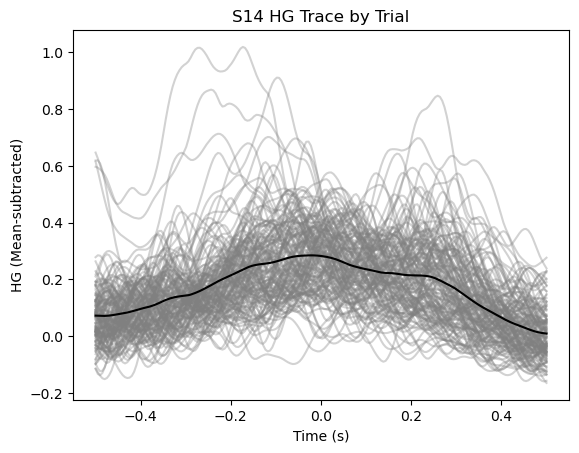

In [9]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(S14_hg_trace, axis=2).T, 'grey', alpha=0.35)
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(np.mean(S14_hg_trace, axis=2), axis=0), 'black')
plt.xlabel('Time (s)')
plt.ylabel('HG (Mean-subtracted)')
plt.title('S14 HG Trace by Trial')
plt.show()

Load in S26 Data

In [10]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(152, 200, 128)
(152, 8, 16, 200)
(152, 3)


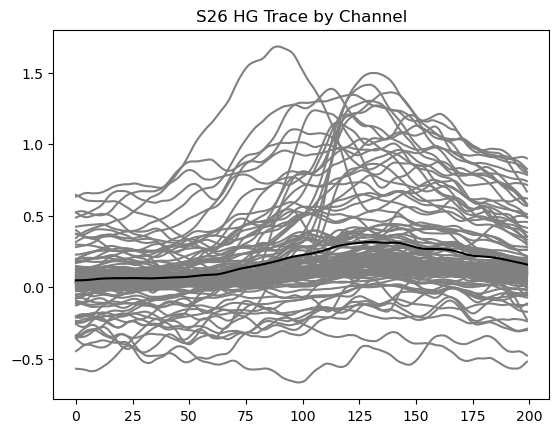

In [11]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [12]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(153, 200, 128)
(153, 8, 16, 200)
(153, 3)


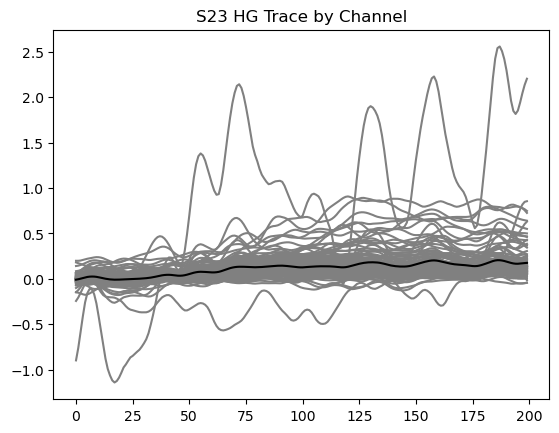

In [13]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [14]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(52, 200, 256)
(52, 12, 24, 200)
(52, 3)


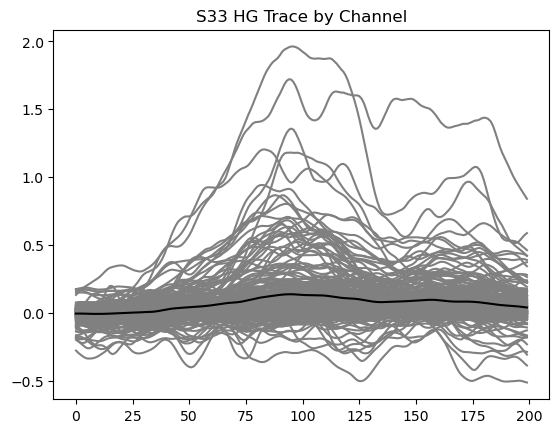

In [15]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

### Relative to Different Phoneme Onsets

In [16]:
from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme

S14 Data

In [17]:
S14_hg_data = load_subject_high_gamma_phoneme('S14', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

FileNotFoundError: [Errno 2] No such file or directory: '../data/S14/S14_HG_p1_sigChannel.mat'

(144, 200, 111) (144, 200, 111) (144, 200, 111)
(144, 8, 16, 200) (144, 8, 16, 200) (144, 8, 16, 200)
(144,) (144,) (144,) (144, 3)


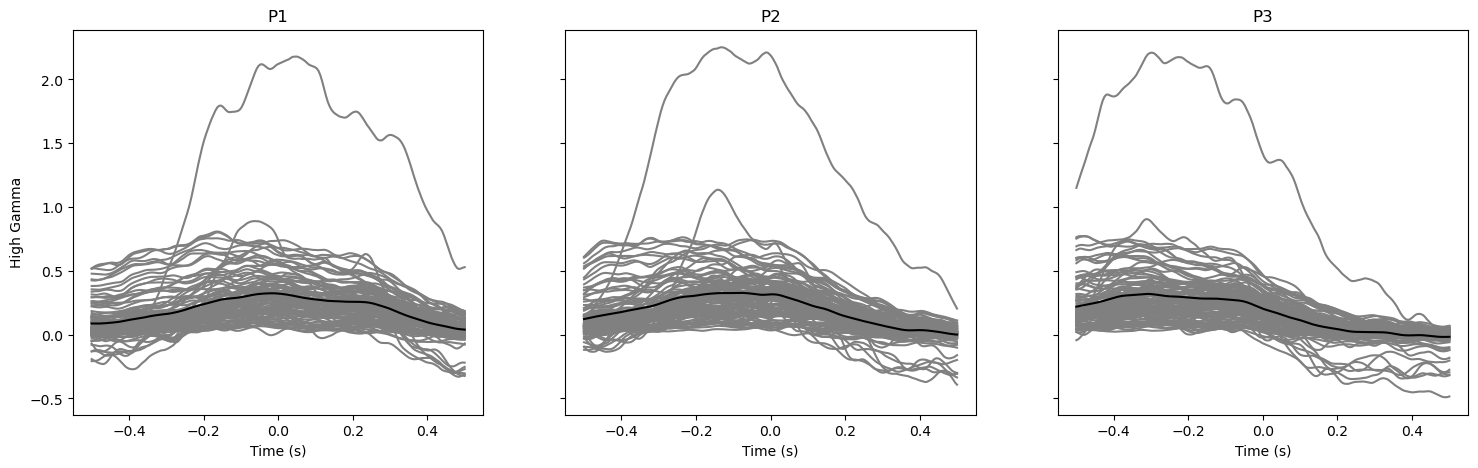

In [ ]:
print(S14_hg_data['X1'].shape, S14_hg_data['X2'].shape, S14_hg_data['X3'].shape)
print(S14_hg_data['X1_map'].shape, S14_hg_data['X2_map'].shape, S14_hg_data['X3_map'].shape)
print(S14_hg_data['y1'].shape, S14_hg_data['y2'].shape, S14_hg_data['y3'].shape, S14_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S14_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S14_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S14_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S14_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S14_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S14_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S14_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S26 data

In [ ]:
S26_hg_data = load_subject_high_gamma_phoneme('S26', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

(148, 200, 111) (148, 200, 111) (148, 200, 111)
(148, 8, 16, 200) (148, 8, 16, 200) (148, 8, 16, 200)
(148,) (148,) (148,) (148, 3)


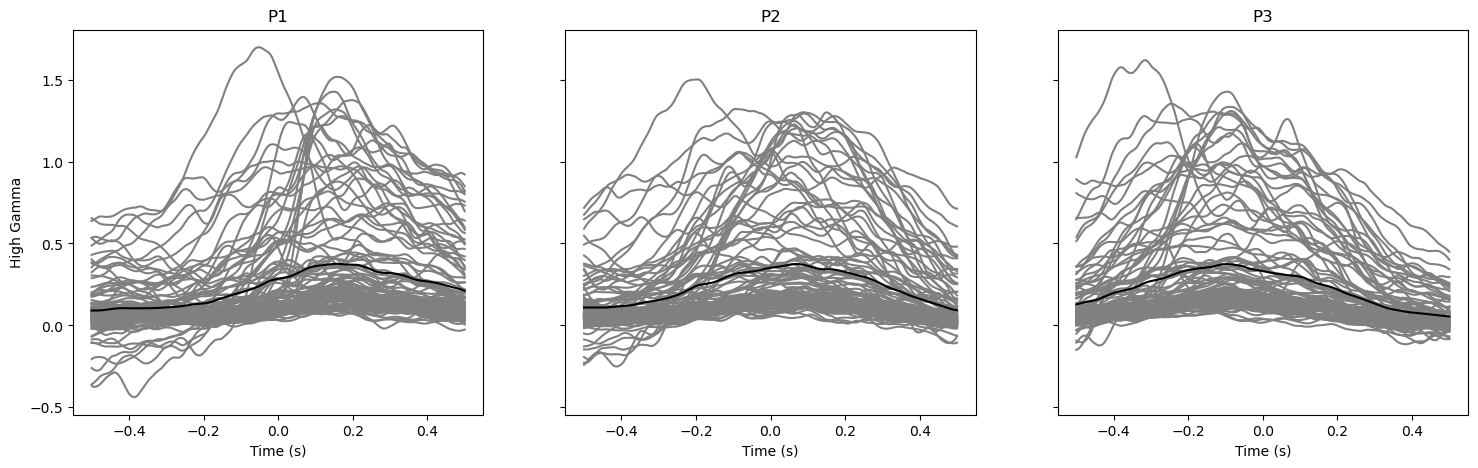

In [ ]:
print(S26_hg_data['X1'].shape, S26_hg_data['X2'].shape, S26_hg_data['X3'].shape)
print(S26_hg_data['X1_map'].shape, S26_hg_data['X2_map'].shape, S26_hg_data['X3_map'].shape)
print(S26_hg_data['y1'].shape, S26_hg_data['y2'].shape, S26_hg_data['y3'].shape, S26_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S26_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S26_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S26_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S26_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S26_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S26_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S26_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()


S23 Data

In [ ]:
S23_hg_data = load_subject_high_gamma_phoneme('S23', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

(151, 200, 63) (151, 200, 63) (151, 200, 63)
(151, 8, 16, 200) (151, 8, 16, 200) (151, 8, 16, 200)
(151,) (151,) (151,) (151, 3)


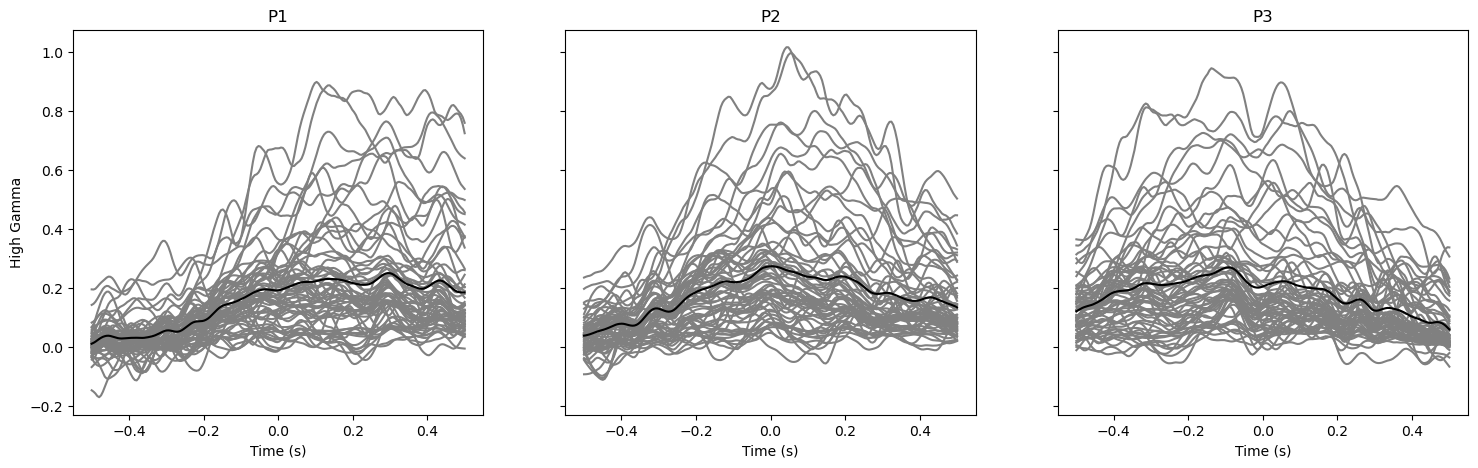

In [ ]:
print(S23_hg_data['X1'].shape, S23_hg_data['X2'].shape, S23_hg_data['X3'].shape)
print(S23_hg_data['X1_map'].shape, S23_hg_data['X2_map'].shape, S23_hg_data['X3_map'].shape)
print(S23_hg_data['y1'].shape, S23_hg_data['y2'].shape, S23_hg_data['y3'].shape, S23_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S23_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S23_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S23_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S23_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S23_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S23_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S23_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S33 Data

In [ ]:
S33_hg_data = load_subject_high_gamma_phoneme('S33', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

(46, 200, 149) (46, 200, 149) (46, 200, 149)
(46, 12, 24, 200) (46, 12, 24, 200) (46, 12, 24, 200)
(46,) (46,) (46,) (46, 3)


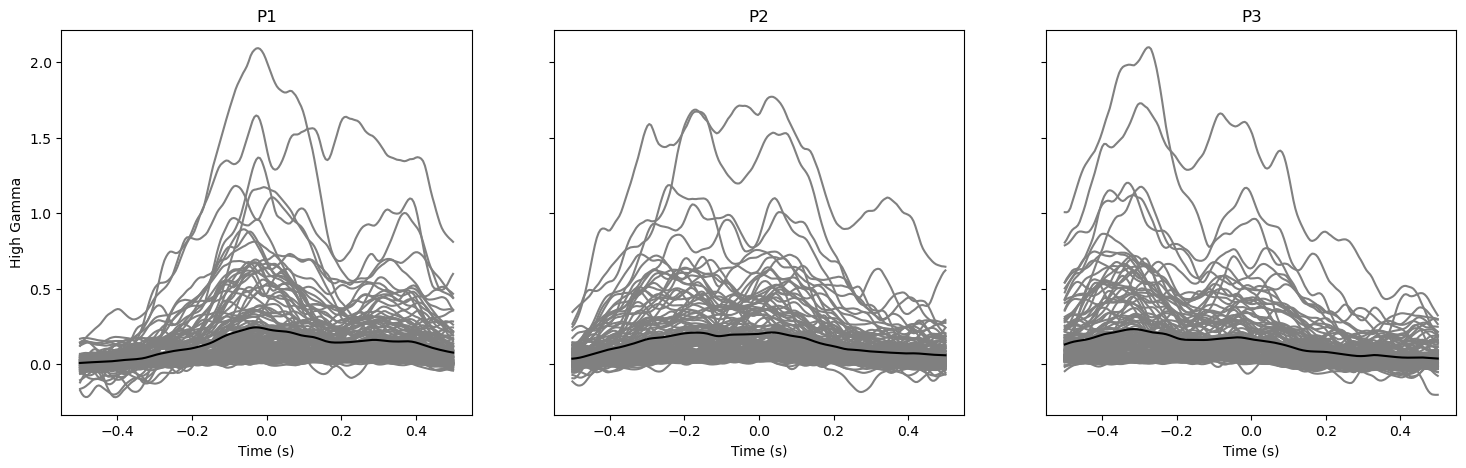

In [ ]:
print(S33_hg_data['X1'].shape, S33_hg_data['X2'].shape, S33_hg_data['X3'].shape)
print(S33_hg_data['X1_map'].shape, S33_hg_data['X2_map'].shape, S33_hg_data['X3_map'].shape)
print(S33_hg_data['y1'].shape, S33_hg_data['y2'].shape, S33_hg_data['y3'].shape, S33_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S33_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S33_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S33_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S33_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S33_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S33_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S33_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

### Labels

In [18]:
S14_artic_labels = phon_to_artic_seq(S14_phon_labels, phon_to_artic_dict)
S26_artic_labels = phon_to_artic_seq(S26_phon_labels, phon_to_artic_dict)
S23_artic_labels = phon_to_artic_seq(S23_phon_labels, phon_to_artic_dict)
S33_artic_labels = phon_to_artic_seq(S33_phon_labels, phon_to_artic_dict)

In [19]:
S14_str_labels_cv_seq = labels2cv_seq(S14_phon_labels)
S26_str_labels_cv_seq = labels2cv_seq(S26_phon_labels)
S23_str_labels_cv_seq = labels2cv_seq(S23_phon_labels)
S33_str_labels_cv_seq = labels2cv_seq(S33_phon_labels)

### Collapse Across Positions

In [ ]:
S14_hg_collapsed = np.concatenate((S14_hg_data['X1'], S14_hg_data['X2'], S14_hg_data['X3']), axis=0)
S14_phon_labels_collapsed = np.concatenate((S14_hg_data['y1'], S14_hg_data['y2'], S14_hg_data['y3']), axis=0)

S26_hg_collapsed = np.concatenate((S26_hg_data['X1'], S26_hg_data['X2'], S26_hg_data['X3']), axis=0)
S26_phon_labels_collapsed = np.concatenate((S26_hg_data['y1'], S26_hg_data['y2'], S26_hg_data['y3']), axis=0)

S23_hg_collapsed = np.concatenate((S23_hg_data['X1'], S23_hg_data['X2'], S23_hg_data['X3']), axis=0)
S23_phon_labels_collapsed = np.concatenate((S23_hg_data['y1'], S23_hg_data['y2'], S23_hg_data['y3']), axis=0)

S33_hg_collapsed = np.concatenate((S33_hg_data['X1'], S33_hg_data['X2'], S33_hg_data['X3']), axis=0)
S33_phon_labels_collapsed = np.concatenate((S33_hg_data['y1'], S33_hg_data['y2'], S33_hg_data['y3']), axis=0)

NameError: name 'S14_hg_data' is not defined

In [ ]:
S14_artic_labels_collapsed = phon_to_artic_seq(S14_phon_labels_collapsed, phon_to_artic_dict)
S26_artic_labels_collapsed = phon_to_artic_seq(S26_phon_labels_collapsed, phon_to_artic_dict)
S23_artic_labels_collapsed = phon_to_artic_seq(S23_phon_labels_collapsed, phon_to_artic_dict)
S33_artic_labels_collapsed = phon_to_artic_seq(S33_phon_labels_collapsed, phon_to_artic_dict)

NameError: name 'S14_phon_labels_collapsed' is not defined

# Separate PCA

In [66]:
from sklearn.decomposition import PCA

n_comp = 10

S14_hg_pca = PCA(n_components=n_comp).fit_transform(S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1])).reshape(S14_hg_trace.shape[0], S14_hg_trace.shape[1], n_comp)
S26_hg_pca = PCA(n_components=n_comp).fit_transform(S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1])).reshape(S26_hg_trace.shape[0], S26_hg_trace.shape[1], n_comp)
S23_hg_pca = PCA(n_components=n_comp).fit_transform(S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1])).reshape(S23_hg_trace.shape[0], S23_hg_trace.shape[1], n_comp)
S33_hg_pca = PCA(n_components=n_comp).fit_transform(S33_hg_trace.reshape(-1, S33_hg_trace.shape[-1])).reshape(S33_hg_trace.shape[0], S33_hg_trace.shape[1], n_comp)


## Traces

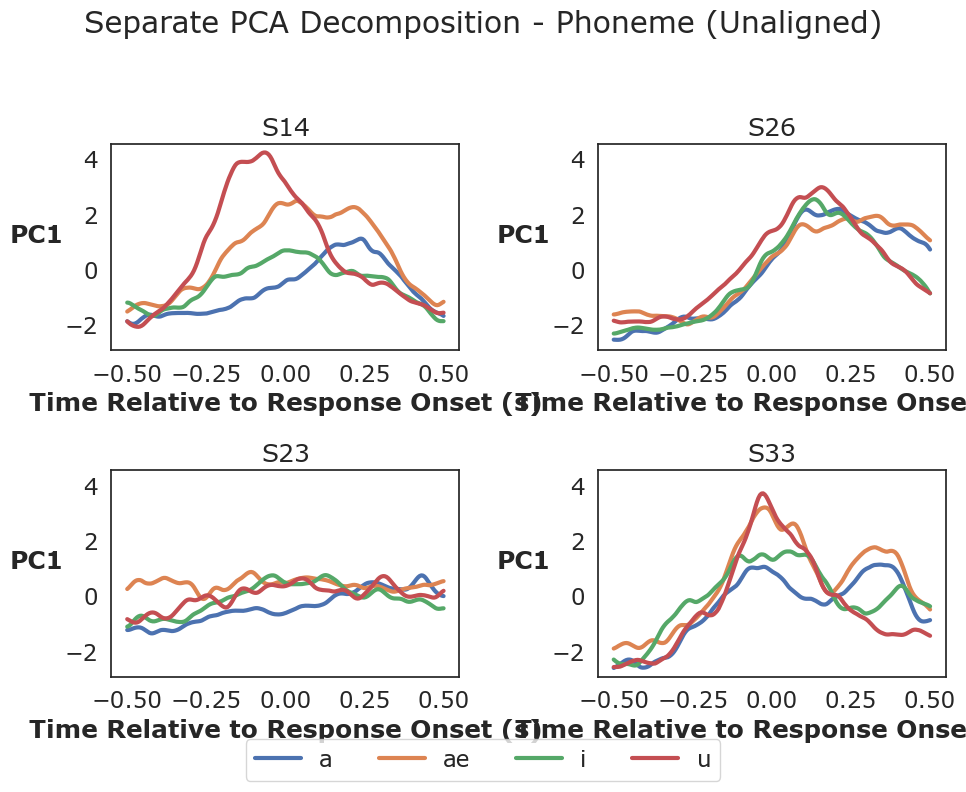

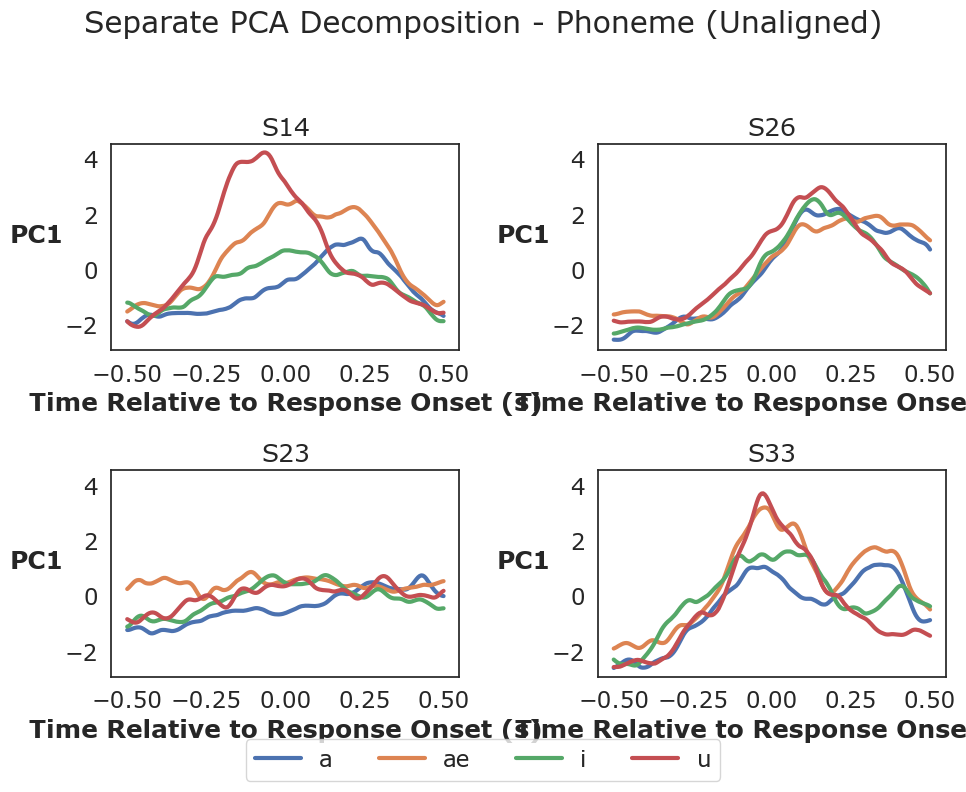

In [67]:
from alignment_visualization import plot_1D_lat_dyn

t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
plot_1D_lat_dyn(t, [S14_hg_pca, S26_hg_pca, S23_hg_pca, S33_hg_pca],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                  #  [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                #    artic_labels,
                   phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'], pc_ind=0,
                #    title='Joint PCA Decomposition - Articulator (Unaligned)',
                   title='Separate PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True, figsize=(10, 8))

In [68]:
from utils import label2str

S14_phon_seqs = label2str(S14_phon_labels)
S26_phon_seqs = label2str(S26_phon_labels)
S23_phon_seqs = label2str(S23_phon_labels)
S33_phon_seqs = label2str(S33_phon_labels)

In [69]:
from alignment_methods import CCAAlign

cca1, cca2, cca3 = CCAAlign(), CCAAlign(), CCAAlign()
cca1.fit(S14_hg_pca, S26_hg_pca, S14_phon_seqs, S26_phon_seqs)
cca2.fit(S14_hg_pca, S23_hg_pca, S14_phon_seqs, S23_phon_seqs)
cca3.fit(S14_hg_pca, S33_hg_pca, S14_phon_seqs, S33_phon_seqs)

S26_pca_S14_algn = cca1.transform(S26_hg_pca)
S23_pca_S14_algn = cca2.transform(S23_hg_pca)
S33_pca_S14_algn = cca3.transform(S33_hg_pca)

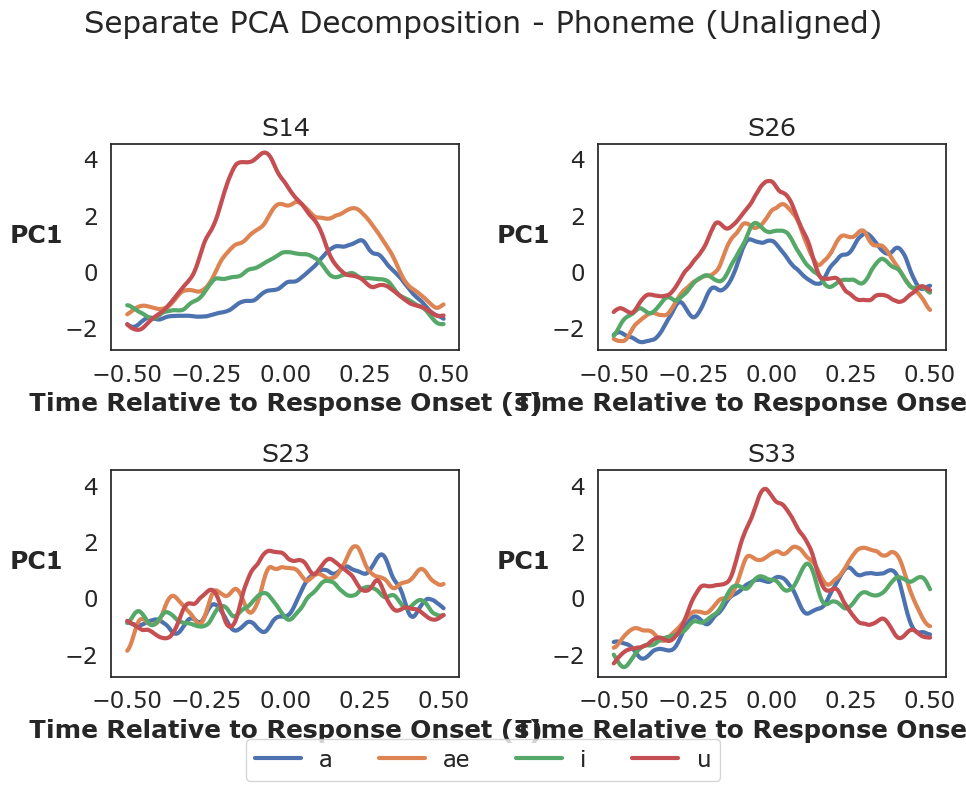

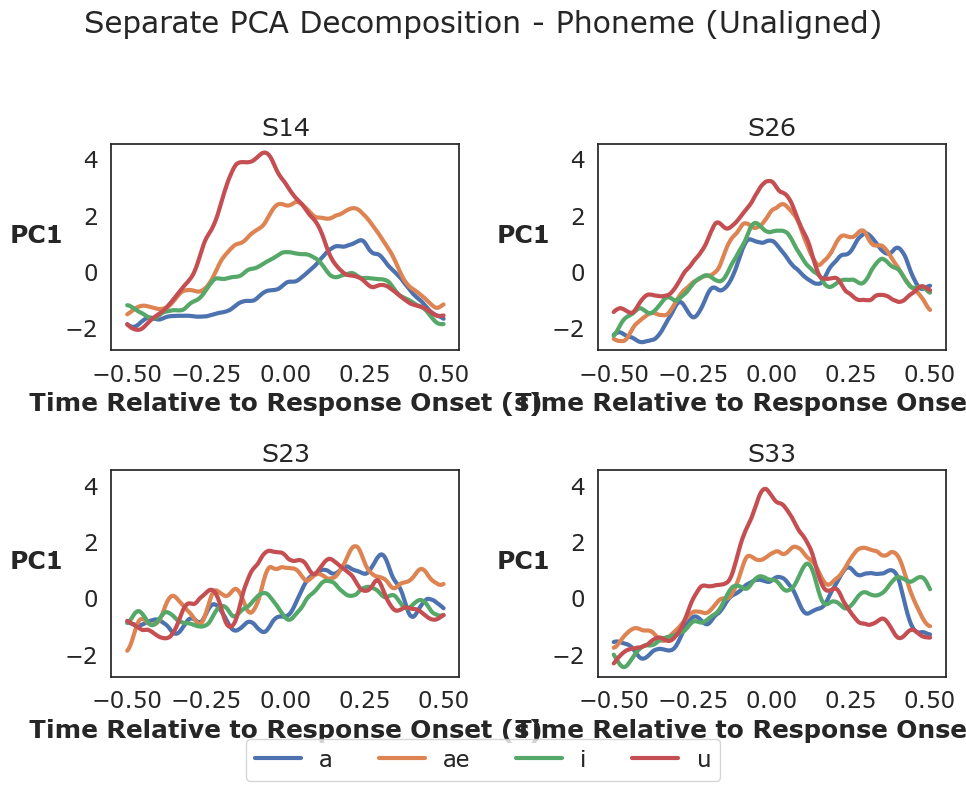

In [70]:
plot_1D_lat_dyn(t, [S14_hg_pca, S26_pca_S14_algn, S23_pca_S14_algn, S33_pca_S14_algn],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                #    [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                #    artic_labels,
                   phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'], pc_ind=0,
                #    title='Joint PCA Decomposition - Articulator (Unaligned)',
                   title='Separate PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True, figsize=(10, 8))

## Correlation Unaligned

In [71]:
from functools import reduce
from utils import cnd_avg
from metrics import pt_corr_multi

S14_pca_cnd_avg = cnd_avg(S14_hg_pca, S14_phon_seqs)
S26_pca_cnd_avg = cnd_avg(S26_hg_pca, S26_phon_seqs)
S23_pca_cnd_avg = cnd_avg(S23_hg_pca, S23_phon_seqs)
S33_pca_cnd_avg = cnd_avg(S33_hg_pca, S33_phon_seqs)

# only use same conditions across datasets
cnd_avg_data = [S14_pca_cnd_avg, S26_pca_cnd_avg, S23_pca_cnd_avg, S33_pca_cnd_avg]
labels = [S14_phon_seqs, S26_phon_seqs, S23_phon_seqs, S33_phon_seqs]
shared_lab = reduce(np.intersect1d, labels)
cnd_avg_data = [cnd_avg_data[i][np.isin(np.unique(lab), shared_lab,
                                        assume_unique=True)] for i, lab
                in enumerate(labels)]
# print([d.shape for d in cnd_avg_data])

unalgn_corr = pt_corr_multi(cnd_avg_data[0], cnd_avg_data[1:])

S26_pca_algn_cnd_avg = cnd_avg(S26_pca_S14_algn, S26_phon_seqs)
S23_pca_algn_cnd_avg = cnd_avg(S23_pca_S14_algn, S23_phon_seqs)
S33_pca_algn_cnd_avg = cnd_avg(S33_pca_S14_algn, S33_phon_seqs)

cnd_avg_data_algn = [S14_pca_cnd_avg, S26_pca_algn_cnd_avg, S23_pca_algn_cnd_avg, S33_pca_algn_cnd_avg]
shared_lab_algn = reduce(np.intersect1d, labels)
cnd_avg_data_algn = [cnd_avg_data_algn[i][np.isin(np.unique(lab), shared_lab,
                                          assume_unique=True)] for i, lab
                     in enumerate(labels)]
# print([d.shape for d in cnd_avg_data_algn])

algn_corr = pt_corr_multi(cnd_avg_data_algn[0], cnd_avg_data_algn[1:])

In [72]:
print([np.mean(corr) for corr in unalgn_corr])
print([np.mean(corr) for corr in algn_corr])

[0.20330818066536463, 0.005430724421561573, 0.18959392501953562]
[0.4504027215587312, 0.2522171357715789, 0.4034111842747215]


C:\Users\zms14\AppData\Local\Temp\ipykernel_26288\1969611178.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar((0+0.015*pt, 1+0.015*pt), (np.mean(unalgn_corr[pt]), np.mean(algn_corr[pt])),


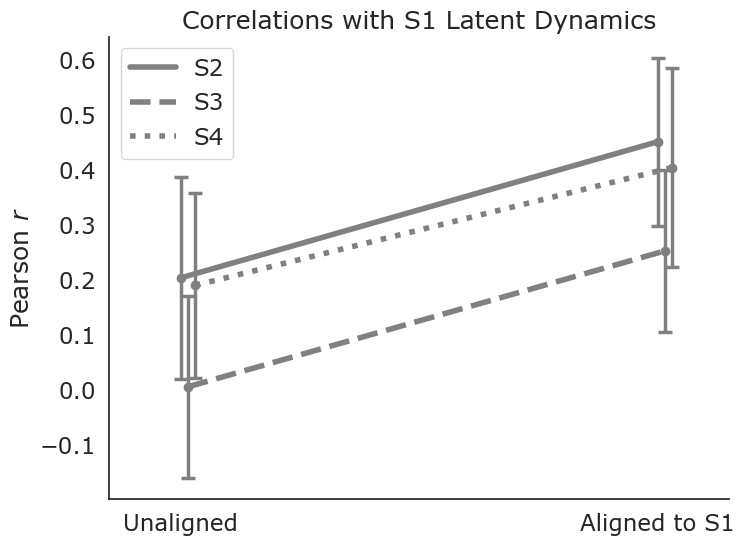

In [73]:
sns.set(font='Verdana', font_scale=1.5, style='white')

# colors = ['indianred', 'cornflowerblue', 'mediumseagreen']
lines = ['-', '--', ':']
pts = ['S2', 'S3', 'S4']

plt.figure(figsize=(8,6))
for pt in range(len(unalgn_corr)):
    plt.errorbar((0+0.015*pt, 1+0.015*pt), (np.mean(unalgn_corr[pt]), np.mean(algn_corr[pt])),
                 yerr=(np.std(unalgn_corr[pt]), np.std(algn_corr[pt])),
                 color='gray',
                 linestyle=lines[pt],
                #  label=pts[pt],
                 fmt='-o', capsize=5, linewidth=4, elinewidth=2.5, capthick=2.5)
    plt.plot([],[], linestyle=lines[pt], color='gray', label=pts[pt], linewidth=4)
plt.xticks((0, 1), ('Unaligned', 'Aligned to S1'))
plt.xlim([-0.15, 1.15])
plt.ylabel(r'Pearson $\it{r}$')
plt.title('Correlations with S1 Latent Dynamics')
plt.legend()
sns.despine()
plt.show()


# Joint PCA decomposition Exploration and Visualization

## Decomposition

In [20]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap
from utils import cnd_avg, label2str

S14_artic_seqs = label2str(S14_artic_labels)
S14_phon_seqs = label2str(S14_phon_labels)
S14_phon_cnd_avg = np.swapaxes(cnd_avg(S14_hg_trace, S14_phon_seqs), 0, -1)
print(S14_phon_cnd_avg.shape)
S14_artic_cnd_avg = np.swapaxes(cnd_avg(S14_hg_trace, S14_artic_seqs), 0, -1)
print(S14_artic_cnd_avg.shape)

S26_artic_seqs = label2str(S26_artic_labels)
S26_phon_seqs = label2str(S26_phon_labels)
S26_phon_cnd_avg = np.swapaxes(cnd_avg(S26_hg_trace, S26_phon_seqs), 0, -1)
print(S26_phon_cnd_avg.shape)
S26_artic_cnd_avg = np.swapaxes(cnd_avg(S26_hg_trace, S26_artic_seqs), 0, -1)
print(S26_artic_cnd_avg.shape)

S23_artic_seqs = label2str(S23_artic_labels)
S23_phon_seqs = label2str(S23_phon_labels)
S23_phon_cnd_avg = np.swapaxes(cnd_avg(S23_hg_trace, S23_phon_seqs), 0, -1)
print(S23_phon_cnd_avg.shape)
S23_artic_cnd_avg = np.swapaxes(cnd_avg(S23_hg_trace, S23_artic_seqs), 0, -1)
print(S23_artic_cnd_avg.shape)

S33_artic_seqs = label2str(S33_artic_labels)
S33_phon_seqs = label2str(S33_phon_labels)
S33_phon_cnd_avg = np.swapaxes(cnd_avg(S33_hg_trace, S33_phon_seqs), 0, -1)
print(S33_phon_cnd_avg.shape)
S33_artic_cnd_avg = np.swapaxes(cnd_avg(S33_hg_trace, S33_artic_seqs), 0, -1)
print(S33_artic_cnd_avg.shape)
print()

cross_pt_phon_mat = np.concatenate([S14_phon_cnd_avg, S26_phon_cnd_avg, S23_phon_cnd_avg], axis=0)
cross_pt_phon_mat_ctrd = cross_pt_phon_mat - np.mean(cross_pt_phon_mat, axis=0)
cross_pt_artic_mat = np.concatenate([S14_artic_cnd_avg, S26_artic_cnd_avg, S23_artic_cnd_avg, S33_artic_cnd_avg], axis=0)
cross_pt_artic_mat_ctrd = cross_pt_artic_mat - np.mean(cross_pt_artic_mat, axis=0)
print(cross_pt_phon_mat.shape)
print(cross_pt_artic_mat.shape)

dr = PCA(n_components=0.8)
# dr = KernelPCA(n_components=40, kernel='rbf')
# dr = Isomap(n_components=40)
# phon_factor_mat = dr.fit_transform(cross_pt_phon_mat.reshape(cross_pt_phon_mat.shape[0], -1).T).T
# artic_factor_mat = dr.fit_transform(cross_pt_artic_mat.reshape(cross_pt_artic_mat.shape[0], -1).T).T
phon_factor_mat = dr.fit_transform(cross_pt_phon_mat_ctrd.reshape(cross_pt_phon_mat_ctrd.shape[0], -1).T).T
artic_factor_mat = dr.fit_transform(cross_pt_artic_mat_ctrd.reshape(cross_pt_artic_mat_ctrd.shape[0], -1).T).T
print(phon_factor_mat.shape)
print(artic_factor_mat.shape)

(128, 200, 52)
(128, 200, 15)
(128, 200, 52)
(128, 200, 15)
(128, 200, 52)
(128, 200, 15)
(256, 200, 52)
(256, 200, 15)

(384, 200, 52)
(640, 200, 15)
(3, 10400)
(15, 3000)


In [21]:
dr.explained_variance_ratio_

array([0.45395766, 0.10168355, 0.06527251, 0.03295147, 0.02430732,
       0.02069392, 0.01891635, 0.01694161, 0.01432579, 0.01074217,
       0.00959238, 0.00843616, 0.00812157, 0.00754366, 0.00679378])

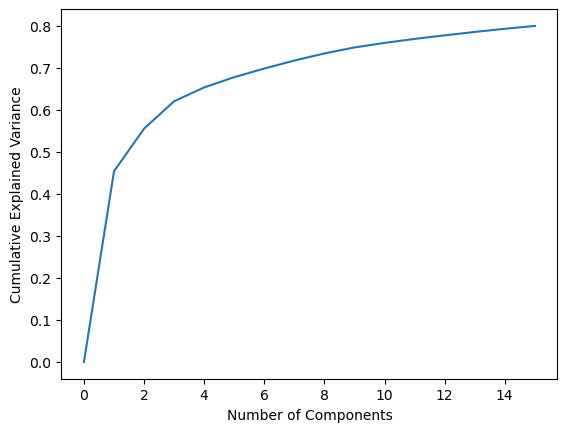

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([0] + [*np.cumsum(dr.explained_variance_ratio_)])
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.show()

# print(np.cumsum(dr.explained_variance_ratio_))

# expl_thresh = 0.9
# comp_expl = np.where(np.cumsum(pca.explained_variance_ratio_) > expl_thresh)[0][0]
# print(f'Number of components to explain {expl_thresh*100}% of variance: {comp_expl}')

Phoneme Condition Averaging

In [23]:
##### wrong but useful for patient-specific #####

# S14_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S14_phon_cnd_avg.reshape(S14_phon_cnd_avg.shape[0], -1).T
# print(S14_factor_trans.shape)
# S14_joint_decomp = S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1]) @ S14_factor_trans.T
# S14_joint_decomp = S14_joint_decomp.reshape(S14_hg_trace.shape[0], S14_hg_trace.shape[1], -1)
# print(S14_joint_decomp.shape)
# print()

# S26_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S26_phon_cnd_avg.reshape(S26_phon_cnd_avg.shape[0], -1).T
# print(S26_factor_trans.shape)
# S26_joint_decomp = S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1]) @ S26_factor_trans.T
# S26_joint_decomp = S26_joint_decomp.reshape(S26_hg_trace.shape[0], S26_hg_trace.shape[1], -1)
# print(S26_joint_decomp.shape)
# print()

# S23_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S23_phon_cnd_avg.reshape(S23_phon_cnd_avg.shape[0], -1).T
# print(S23_factor_trans.shape)
# S23_joint_decomp = S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1]) @ S23_factor_trans.T
# S23_joint_decomp = S23_joint_decomp.reshape(S23_hg_trace.shape[0], S23_hg_trace.shape[1], -1)
# print(S23_joint_decomp.shape)
# print()


##### correct joint PCA #####

# S14_factor_trans = np.linalg.pinv(S14_phon_cnd_avg.reshape(S14_phon_cnd_avg.shape[0], -1).T)  @ phon_factor_mat.T
# print(S14_factor_trans.shape)
# S14_joint_decomp = S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1]) @ S14_factor_trans
# S14_joint_decomp = S14_joint_decomp.reshape(S14_hg_trace.shape[0], S14_hg_trace.shape[1], -1)
# print(S14_joint_decomp.shape)
# print()

# # S26_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S26_phon_cnd_avg.reshape(S26_phon_cnd_avg.shape[0], -1).T
# S26_factor_trans = np.linalg.pinv(S26_phon_cnd_avg.reshape(S26_phon_cnd_avg.shape[0], -1).T)  @ phon_factor_mat.T
# print(S26_factor_trans.shape)
# S26_joint_decomp = S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1]) @ S26_factor_trans
# S26_joint_decomp = S26_joint_decomp.reshape(S26_hg_trace.shape[0], S26_hg_trace.shape[1], -1)
# print(S26_joint_decomp.shape)
# print()

# # S23_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S23_phon_cnd_avg.reshape(S23_phon_cnd_avg.shape[0], -1).T
# S23_factor_trans = np.linalg.pinv(S23_phon_cnd_avg.reshape(S23_phon_cnd_avg.shape[0], -1).T)  @ phon_factor_mat.T
# print(S23_factor_trans.shape)
# S23_joint_decomp = S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1]) @ S23_factor_trans
# S23_joint_decomp = S23_joint_decomp.reshape(S23_hg_trace.shape[0], S23_hg_trace.shape[1], -1)
# print(S23_joint_decomp.shape)
# print()

Articulator Condition Averaging

In [24]:
##### wrong but useful for patient-specific #####

# S14_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S14_artic_cnd_avg.reshape(S14_artic_cnd_avg.shape[0], -1).T
# print(S14_factor_trans.shape)
# S14_joint_decomp = S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1]) @ S14_factor_trans.T
# S14_joint_decomp = S14_joint_decomp.reshape(S14_hg_trace.shape[0], S14_hg_trace.shape[1], -1)
# print(S14_joint_decomp.shape)
# print()

# S26_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S26_artic_cnd_avg.reshape(S26_artic_cnd_avg.shape[0], -1).T
# print(S26_factor_trans.shape)
# S26_joint_decomp = S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1]) @ S26_factor_trans.T
# S26_joint_decomp = S26_joint_decomp.reshape(S26_hg_trace.shape[0], S26_hg_trace.shape[1], -1)
# print(S26_joint_decomp.shape)
# print()

# S23_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S23_artic_cnd_avg.reshape(S23_artic_cnd_avg.shape[0], -1).T
# print(S23_factor_trans.shape)
# S23_joint_decomp = S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1]) @ S23_factor_trans.T
# S23_joint_decomp = S23_joint_decomp.reshape(S23_hg_trace.shape[0], S23_hg_trace.shape[1], -1)
# print(S23_joint_decomp.shape)
# print()

# S33_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S33_artic_cnd_avg.reshape(S33_artic_cnd_avg.shape[0], -1).T
# print(S33_factor_trans.shape)
# S33_joint_decomp = S33_hg_trace.reshape(-1, S33_hg_trace.shape[-1]) @ S33_factor_trans.T
# S33_joint_decomp = S33_joint_decomp.reshape(S33_hg_trace.shape[0], S33_hg_trace.shape[1], -1)
# print(S33_joint_decomp.shape)
# print()


##### correct joint PCA #####

S14_factor_trans = np.linalg.pinv(S14_artic_cnd_avg.reshape(S14_artic_cnd_avg.shape[0], -1).T)  @ artic_factor_mat.T
print(S14_factor_trans.shape)
S14_joint_decomp = S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1]) @ S14_factor_trans
S14_joint_decomp = S14_joint_decomp.reshape(S14_hg_trace.shape[0], S14_hg_trace.shape[1], -1)
print(S14_joint_decomp.shape)
print()

S26_factor_trans = np.linalg.pinv(S26_artic_cnd_avg.reshape(S26_artic_cnd_avg.shape[0], -1).T)  @ artic_factor_mat.T
print(S26_factor_trans.shape)
S26_joint_decomp = S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1]) @ S26_factor_trans
S26_joint_decomp = S26_joint_decomp.reshape(S26_hg_trace.shape[0], S26_hg_trace.shape[1], -1)
print(S26_joint_decomp.shape)
print()

S23_factor_trans = np.linalg.pinv(S23_artic_cnd_avg.reshape(S23_artic_cnd_avg.shape[0], -1).T)  @ artic_factor_mat.T
print(S23_factor_trans.shape)
S23_joint_decomp = S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1]) @ S23_factor_trans
S23_joint_decomp = S23_joint_decomp.reshape(S23_hg_trace.shape[0], S23_hg_trace.shape[1], -1)
print(S23_joint_decomp.shape)
print()

S33_factor_trans = np.linalg.pinv(S33_artic_cnd_avg.reshape(S33_artic_cnd_avg.shape[0], -1).T)  @ artic_factor_mat.T
print(S33_factor_trans.shape)
S33_joint_decomp = S33_hg_trace.reshape(-1, S33_hg_trace.shape[-1]) @ S33_factor_trans
S33_joint_decomp = S33_joint_decomp.reshape(S33_hg_trace.shape[0], S33_hg_trace.shape[1], -1)
print(S33_joint_decomp.shape)
print()

(128, 15)
(149, 200, 15)

(128, 15)
(152, 200, 15)

(128, 15)
(153, 200, 15)

(256, 15)
(52, 200, 15)



## CCA-Alignment

In [102]:
from alignment_methods import CCA_align_by_class
_, X_S26_S14 = CCA_align_by_class(S14_joint_decomp, S26_joint_decomp, S14_artic_labels, S26_artic_labels, return_space='b_to_a')
_, X_S23_S14 = CCA_align_by_class(S14_joint_decomp, S23_joint_decomp, S14_artic_labels, S23_artic_labels, return_space='b_to_a')
_, X_S33_S14 = CCA_align_by_class(S14_joint_decomp, S33_joint_decomp, S14_artic_labels, S33_artic_labels, return_space='b_to_a')

_, X_S14_S33 = CCA_align_by_class(S33_joint_decomp, S14_joint_decomp, S33_artic_labels, S14_artic_labels, return_space='b_to_a')
_, X_S26_S33 = CCA_align_by_class(S33_joint_decomp, S26_joint_decomp, S33_artic_labels, S26_artic_labels, return_space='b_to_a')
_, X_S23_S33 = CCA_align_by_class(S33_joint_decomp, S23_joint_decomp, S33_artic_labels, S23_artic_labels, return_space='b_to_a')

# _, X_S26_S14 = CCA_align_by_class(S14_joint_decomp, S26_joint_decomp, S14_phon_labels, S26_phon_labels, return_space='b_to_a')
# _, X_S23_S14 = CCA_align_by_class(S14_joint_decomp, S23_joint_decomp, S14_phon_labels, S23_phon_labels, return_space='b_to_a')
# _, X_S33_S14 = CCA_align_by_class(S14_joint_decomp, S33_joint_decomp, S14_phon_labels, S33_phon_labels, return_space='b_to_a')

ImportError: attempted relative import with no known parent package

## Electrode Contribution

In [40]:
import scipy.io as sio
S14_chan_map = sio.loadmat('../data/S14/channelMap.mat')['chanMap']
S26_chan_map = sio.loadmat('../data/S26/channelMap.mat')['chanMap']
S23_chan_map = sio.loadmat('../data/S23/channelMap.mat')['chanMap']
S33_chan_map = sio.loadmat('../data/S33/channelMapAll.mat')['chanMapAll'][:12,:24]

In [41]:
from copy import copy

elec_expl_var = copy(dr.explained_variance_ratio_)
elec_expl_var[0] = 0
elec_vars = elec_expl_var @ dr.components_
S14_elec_start = 0
S26_elec_start = S14_elec_start + S14_artic_cnd_avg.shape[0]
S23_elec_start = S26_elec_start + S26_artic_cnd_avg.shape[0]
S33_elec_start = S23_elec_start + S23_artic_cnd_avg.shape[0]
S14_var = elec_vars[:S26_elec_start]
S26_var = elec_vars[S26_elec_start:S23_elec_start]
S23_var = elec_vars[S23_elec_start:S33_elec_start]
S33_var = elec_vars[S33_elec_start:]

In [177]:
def chan_disp(data, chan_map, title, label, figsize=(10, 8)):
    chan_data = np.array([data[int(i)] if not np.isnan(i) else np.nan for i in (chan_map.flatten()-1)])
    chan_data = chan_data.reshape(chan_map.shape)
    f = plt.figure(figsize=figsize)
    im = plt.imshow(chan_data)
    # plt.gca().invert_yaxis()
    # plt.contourf(chan_data, cmap='viridis')
    cbar = plt.colorbar(im)
    cbar.set_label(label)
    plt.title(title)
    plt.show()

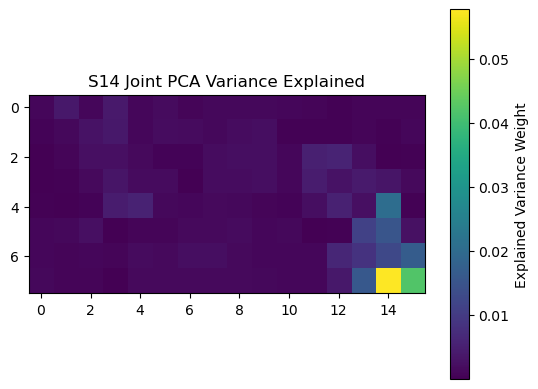

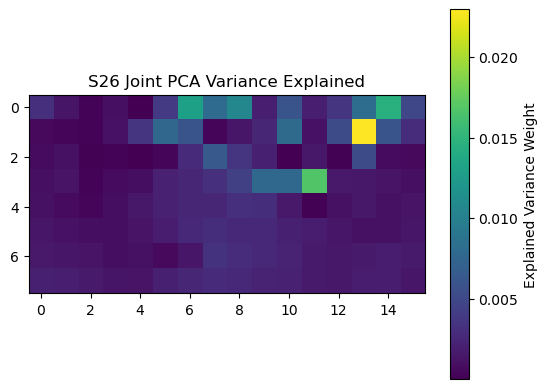

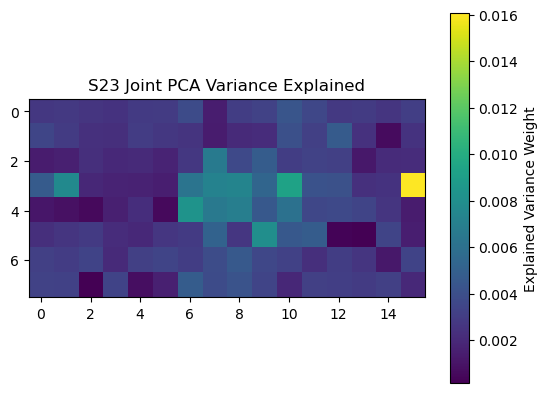

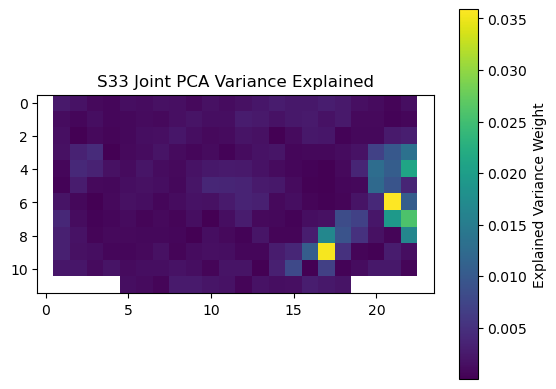

In [43]:
chan_disp(np.abs(S14_var), np.flipud(S14_chan_map), 'S14 Joint PCA Variance Explained', 'Explained Variance Weight')
chan_disp(np.abs(S26_var), np.flipud(S26_chan_map), 'S26 Joint PCA Variance Explained', 'Explained Variance Weight')
chan_disp(np.abs(S23_var), np.flipud(S23_chan_map), 'S23 Joint PCA Variance Explained', 'Explained Variance Weight')
chan_disp(np.abs(S33_var), np.flipud(S33_chan_map), 'S33 Joint PCA Variance Explained', 'Explained Variance Weight')

## Trace Visualization (Matplotlib)

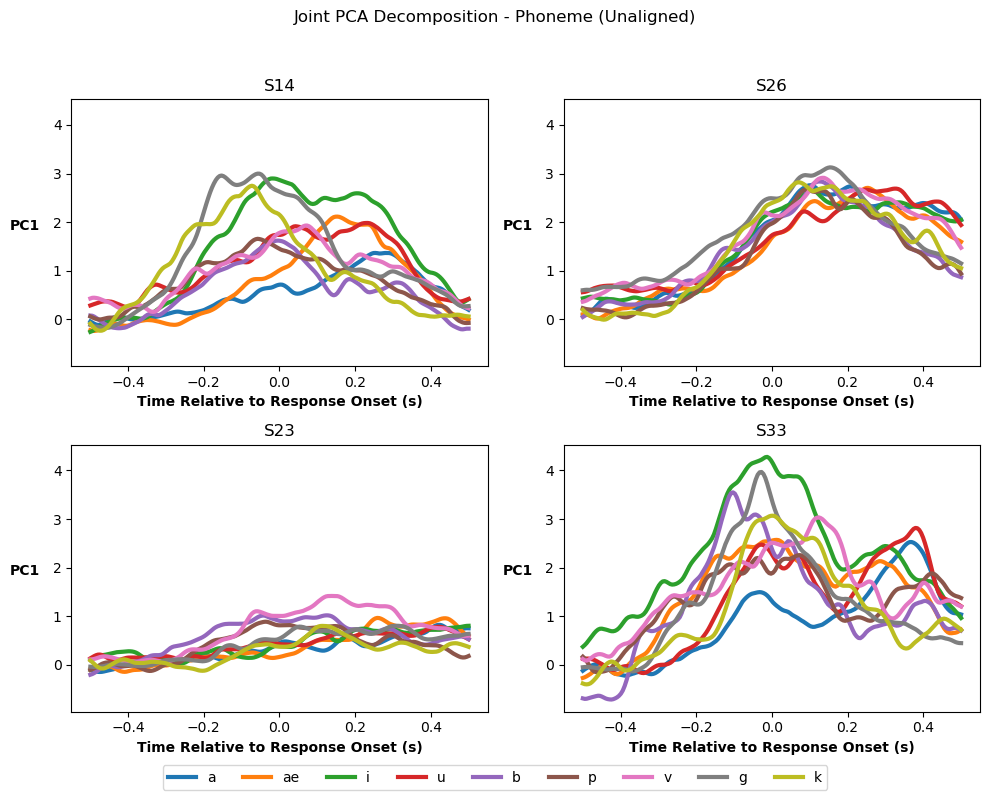

In [31]:
from alignment_visualization import plot_1D_lat_dyn, plot_2D_lat_dyn, plot_3D_lat_dyn

t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
_ = plot_1D_lat_dyn(t, [S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                #    [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                   [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                #    artic_labels,
                   phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'], pc_ind=0,
                #    title='Joint PCA Decomposition - Articulator (Unaligned)',
                   title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True, figsize=(10, 8))

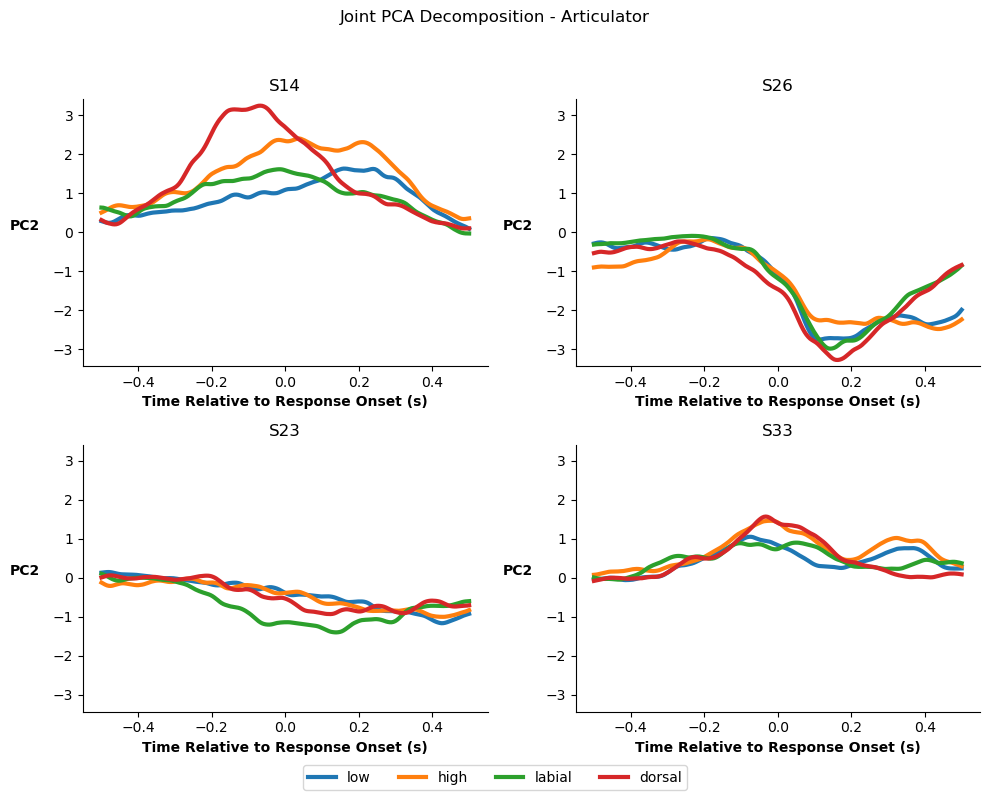

In [32]:
t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
f = plot_1D_lat_dyn(t, [S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                #    [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                   artic_labels,
                #    phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'], pc_ind=1,
                   title='Joint PCA Decomposition - Articulator',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True, figsize=(10, 8))
sns.despine(f)
plt.show()

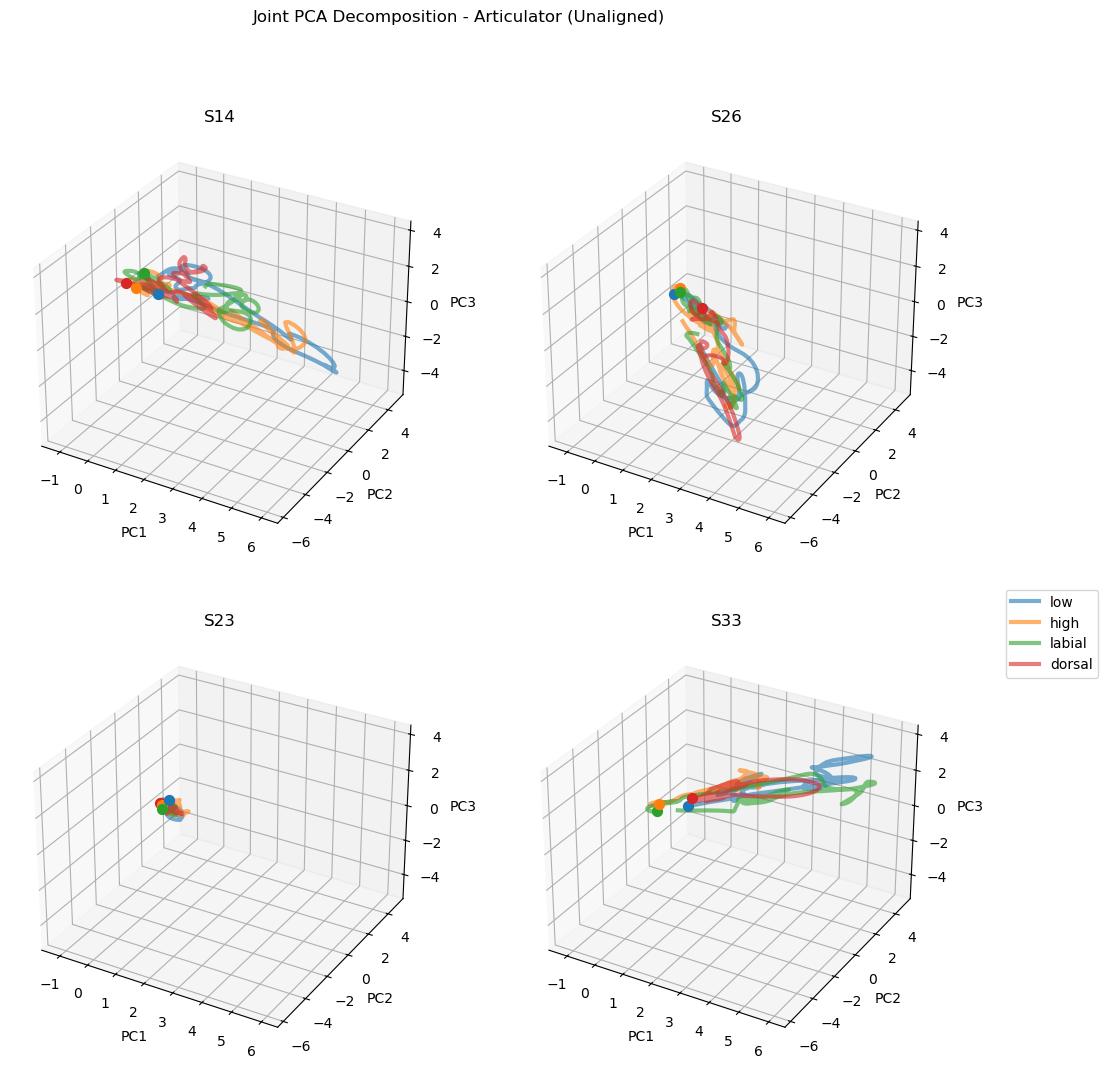

In [33]:
f = plot_3D_lat_dyn([S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                  #  [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                   artic_labels,
                  #  phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'],
                   title='Joint PCA Decomposition - Articulator (Unaligned)',
                  #  title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True)

In [62]:
S14_cv_seqs = np.ones(S14_str_labels_cv_seq.shape)
S14_cv_seqs[np.where(S14_str_labels_cv_seq == 'vcv')] = 2

S26_cv_seqs = np.ones(S26_str_labels_cv_seq.shape)
S26_cv_seqs[np.where(S26_str_labels_cv_seq == 'vcv')] = 2

S23_cv_seqs = np.ones(S23_str_labels_cv_seq.shape)
S23_cv_seqs[np.where(S23_str_labels_cv_seq == 'vcv')] = 2

S33_cv_seqs = np.ones(S33_str_labels_cv_seq.shape)
S33_cv_seqs[np.where(S33_str_labels_cv_seq == 'vcv')] = 2

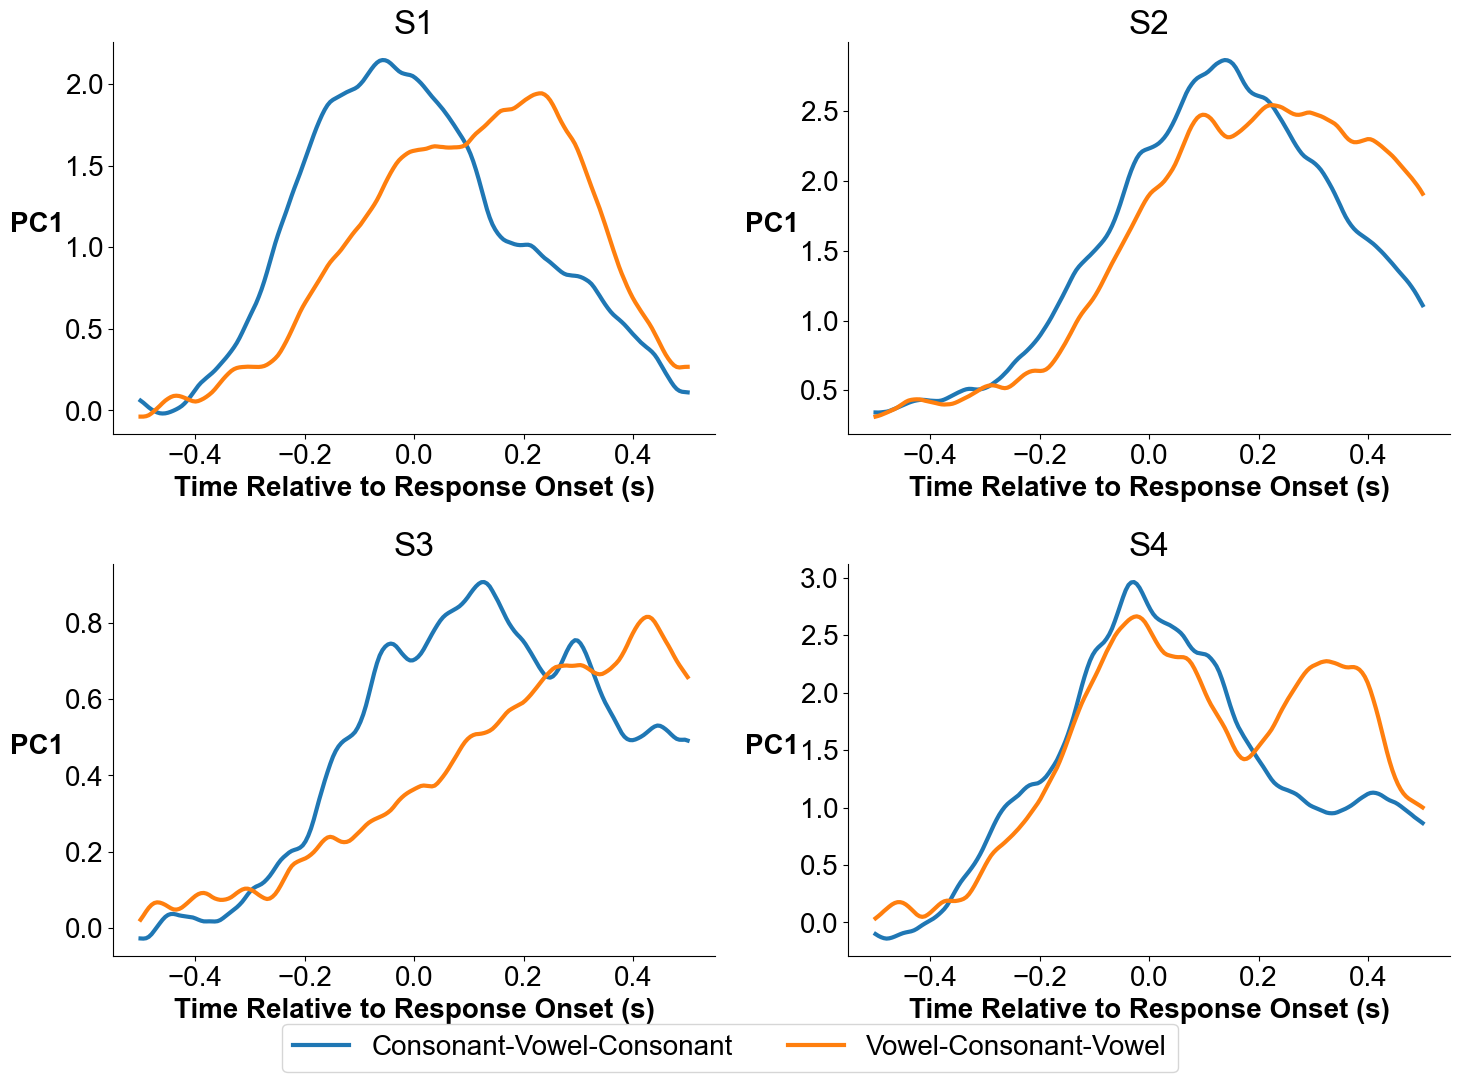

In [64]:
import matplotlib

font = {'family' : 'sans-serif',
        'sans-serif' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
f = plot_1D_lat_dyn(t, [S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['Consonant-Vowel-Consonant', 'Vowel-Consonant-Vowel'],
                   ['S1', 'S2', 'S3', 'S4'], pc_ind=0,
                   title='',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=False,
                   figsize=(15,12))
sns.despine(f)
plt.show()

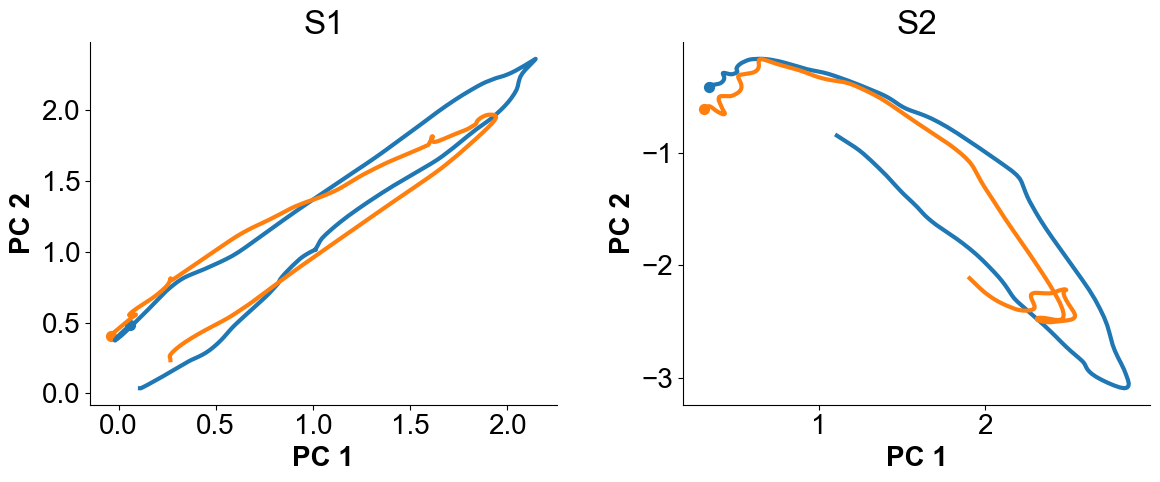

In [36]:
f = plot_2D_lat_dyn([S14_joint_decomp, S26_joint_decomp],
                   [S14_cv_seqs, S26_cv_seqs],
                   ['Consonant-Vowel-Consonant', 'Vowel-Consonant-Vowel'],
                   ['S1', 'S2'], title='',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=False,
                   figsize=(12,6))
sns.despine(f)
plt.show()

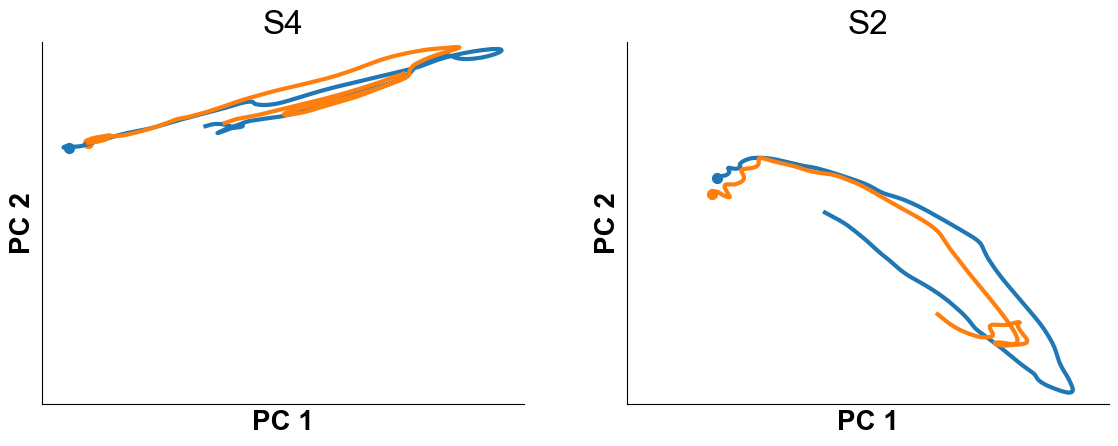

In [37]:
f = plot_2D_lat_dyn([S33_joint_decomp, S26_joint_decomp],
                   [S33_cv_seqs, S26_cv_seqs],
                   ['Consonant-Vowel-Consonant', 'Vowel-Consonant-Vowel'],
                   ['S4', 'S2'], title='',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True,
                   figsize=(12,6))
for ax in f.axes:
   ax.xaxis.set_ticks([])
   ax.yaxis.set_ticks([])
sns.despine(f)
plt.show()

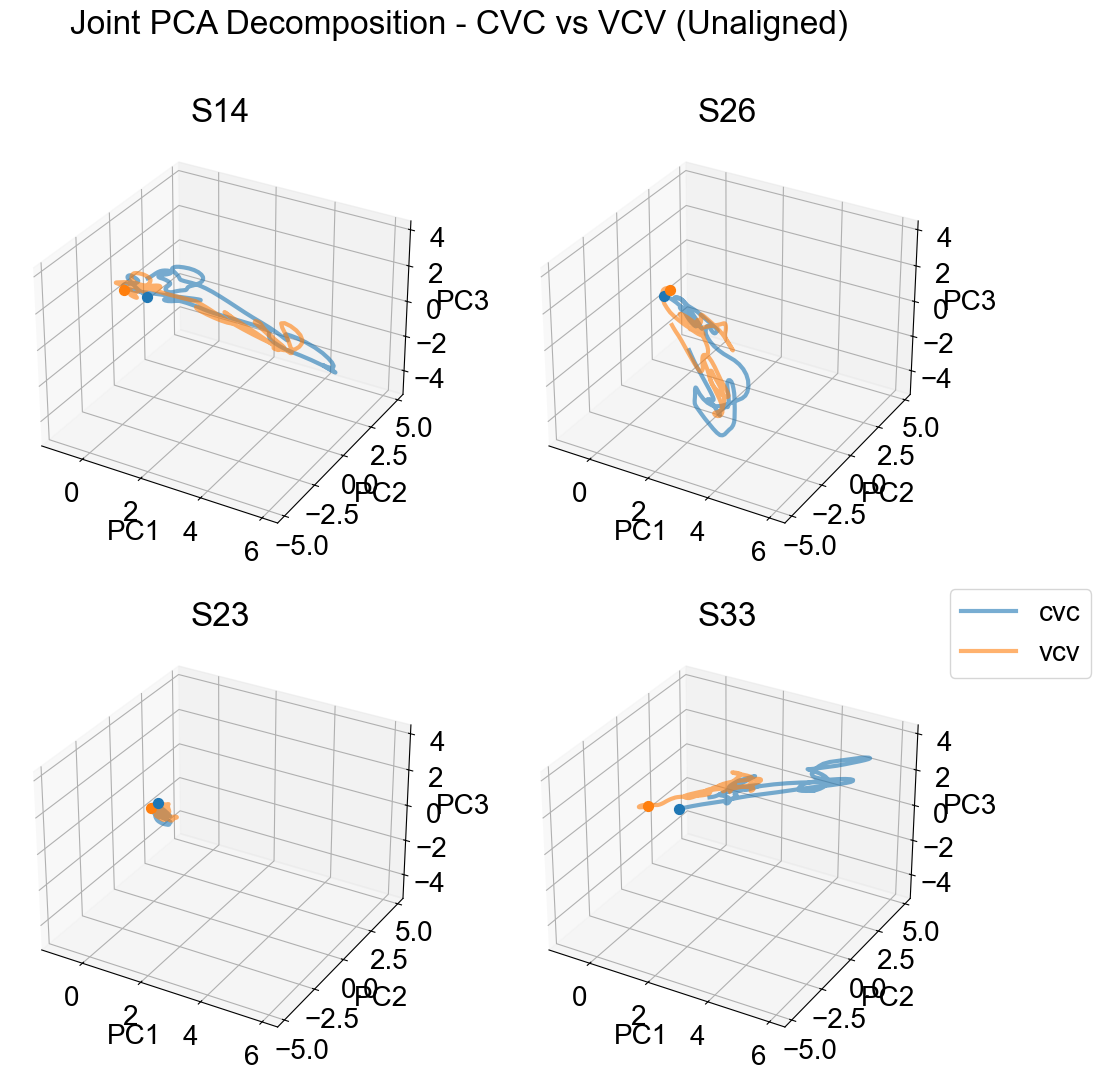

In [38]:
_ = plot_3D_lat_dyn([S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['cvc', 'vcv'],
                   ['S14', 'S26', 'S23', 'S33'],
                   title='Joint PCA Decomposition - CVC vs VCV (Unaligned)',
                   same_axes=True)

Aligning Joint Decomposition

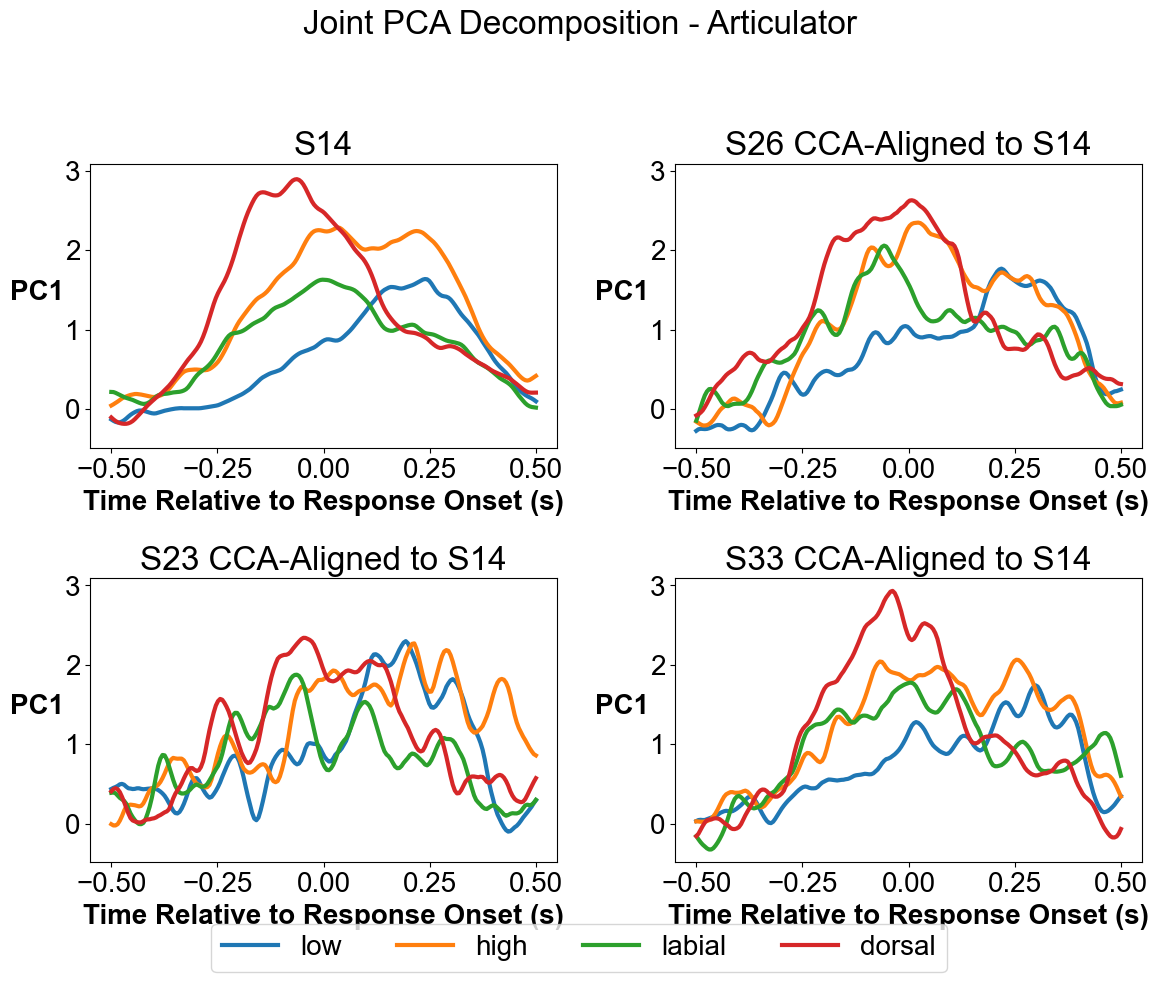

In [41]:
_ = plot_1D_lat_dyn(t, [S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                #    [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                   artic_labels,
                #    phon_labels, 
                   ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'], pc_ind=0,
                   title='Joint PCA Decomposition - Articulator',
                #    title='Joint PCA Decomposition - Phoneme',
                   same_axes=True)

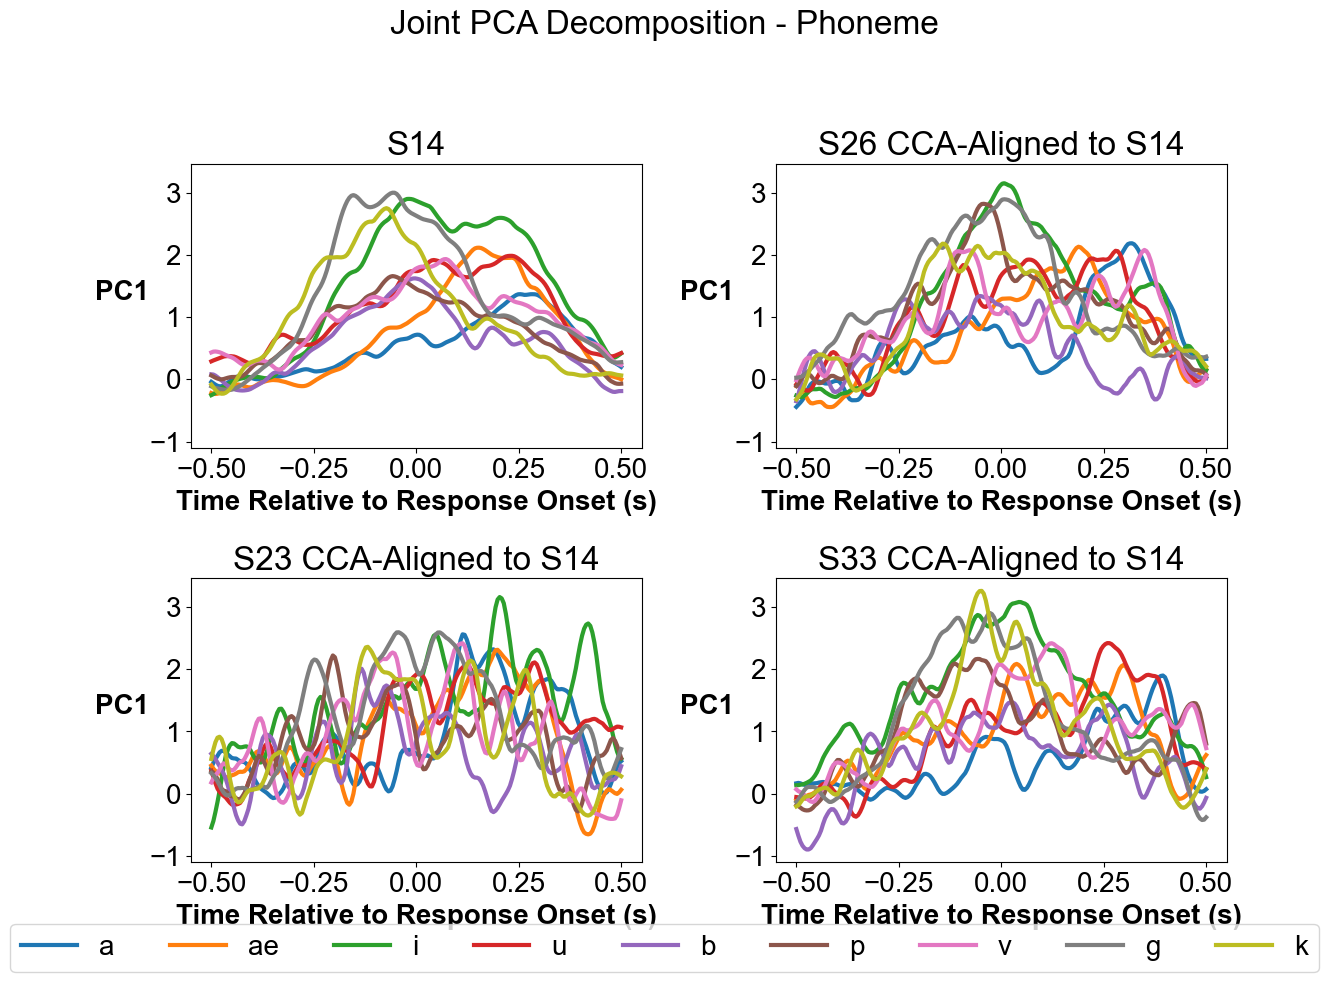

In [42]:
_ = plot_1D_lat_dyn(t, [S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                #    [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                   [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                #    artic_labels,
                   phon_labels, 
                   ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'], pc_ind=0,
                #    title='Joint PCA Decomposition - Articulator',
                   title='Joint PCA Decomposition - Phoneme',
                   same_axes=True)

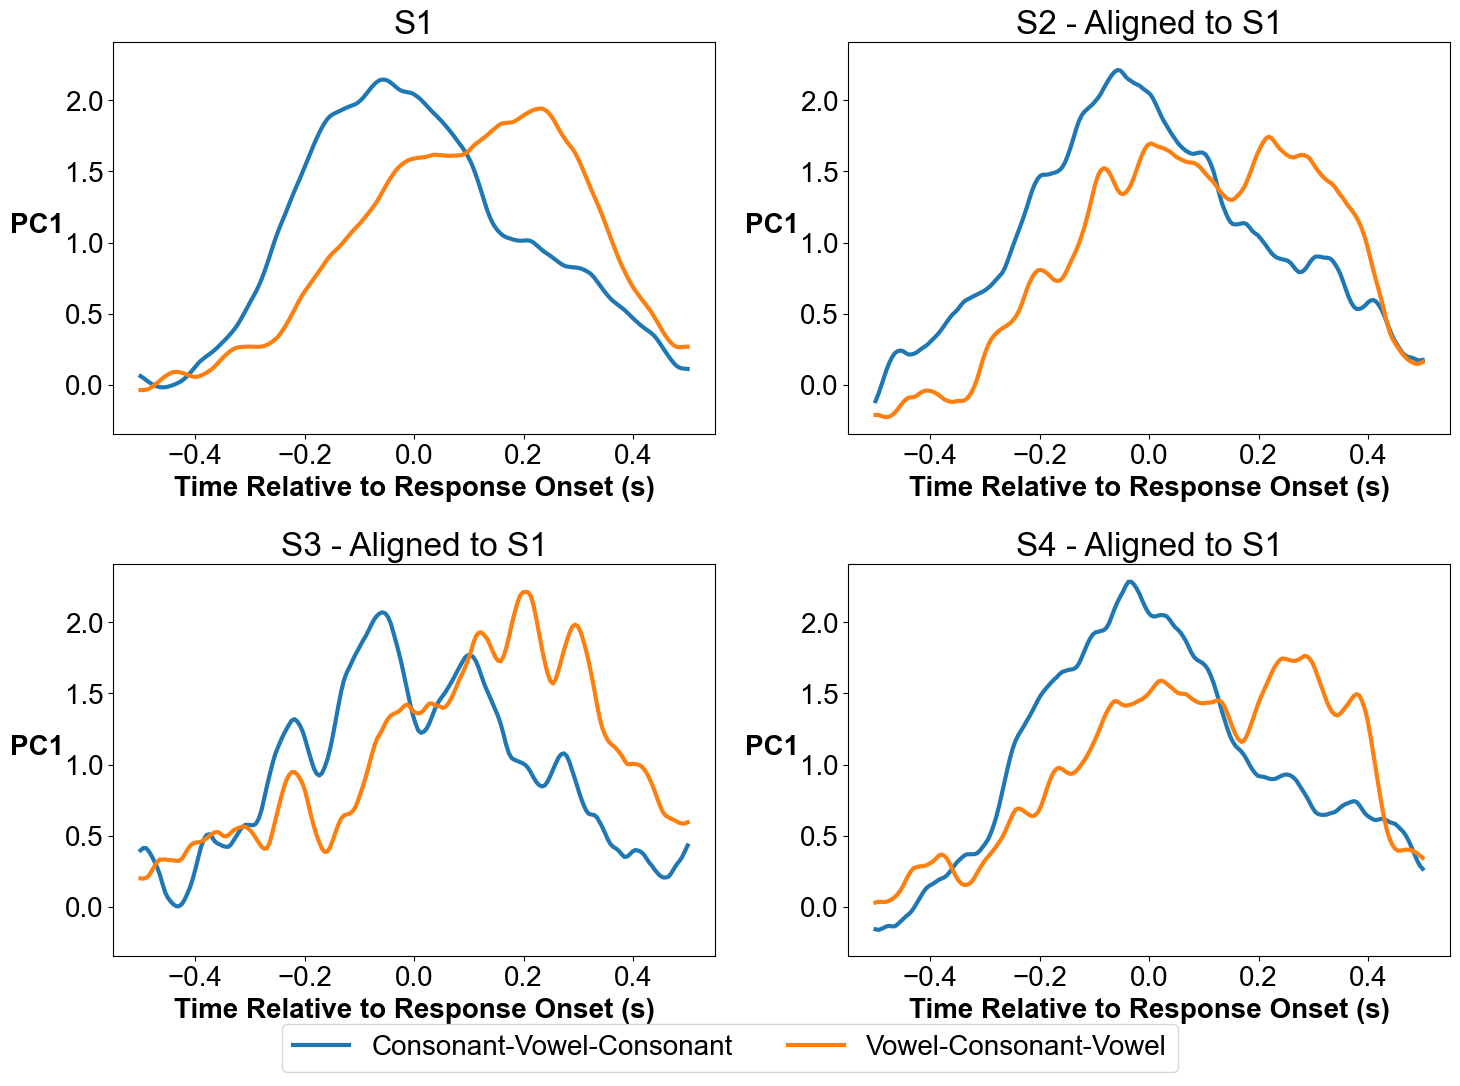

In [43]:
_ = plot_1D_lat_dyn(t, [S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['Consonant-Vowel-Consonant', 'Vowel-Consonant-Vowel'],
                   ['S1', 'S2 - Aligned to S1', 'S3 - Aligned to S1', 'S4 - Aligned to S1'], pc_ind=0,
                   title='',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True, figsize=(15,12))

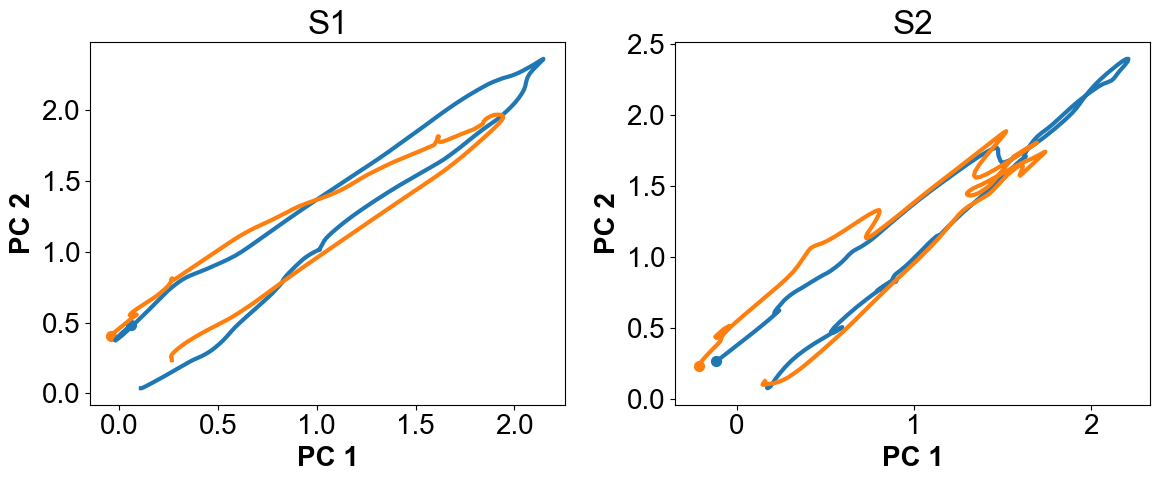

In [44]:
_ = plot_2D_lat_dyn([S14_joint_decomp, X_S26_S14],
                   [S14_cv_seqs, S26_cv_seqs],
                   ['Consonant-Vowel-Consonant', 'Vowel-Consonant-Vowel'],
                   ['S1', 'S2'], title='',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=False,
                   figsize=(12,6))

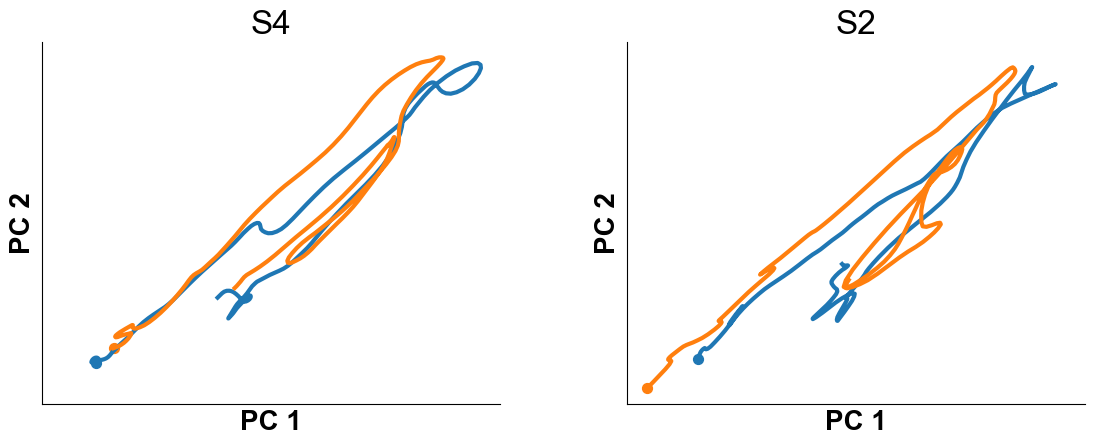

In [45]:
f = plot_2D_lat_dyn([S33_joint_decomp, X_S26_S33],
                   [S33_cv_seqs, S26_cv_seqs],
                   ['Consonant-Vowel-Consonant', 'Vowel-Consonant-Vowel'],
                   ['S4', 'S2'], title='',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True,
                   figsize=(12,6))
for ax in f.axes:
   ax.xaxis.set_ticks([])
   ax.yaxis.set_ticks([])
sns.despine(f)
plt.show()

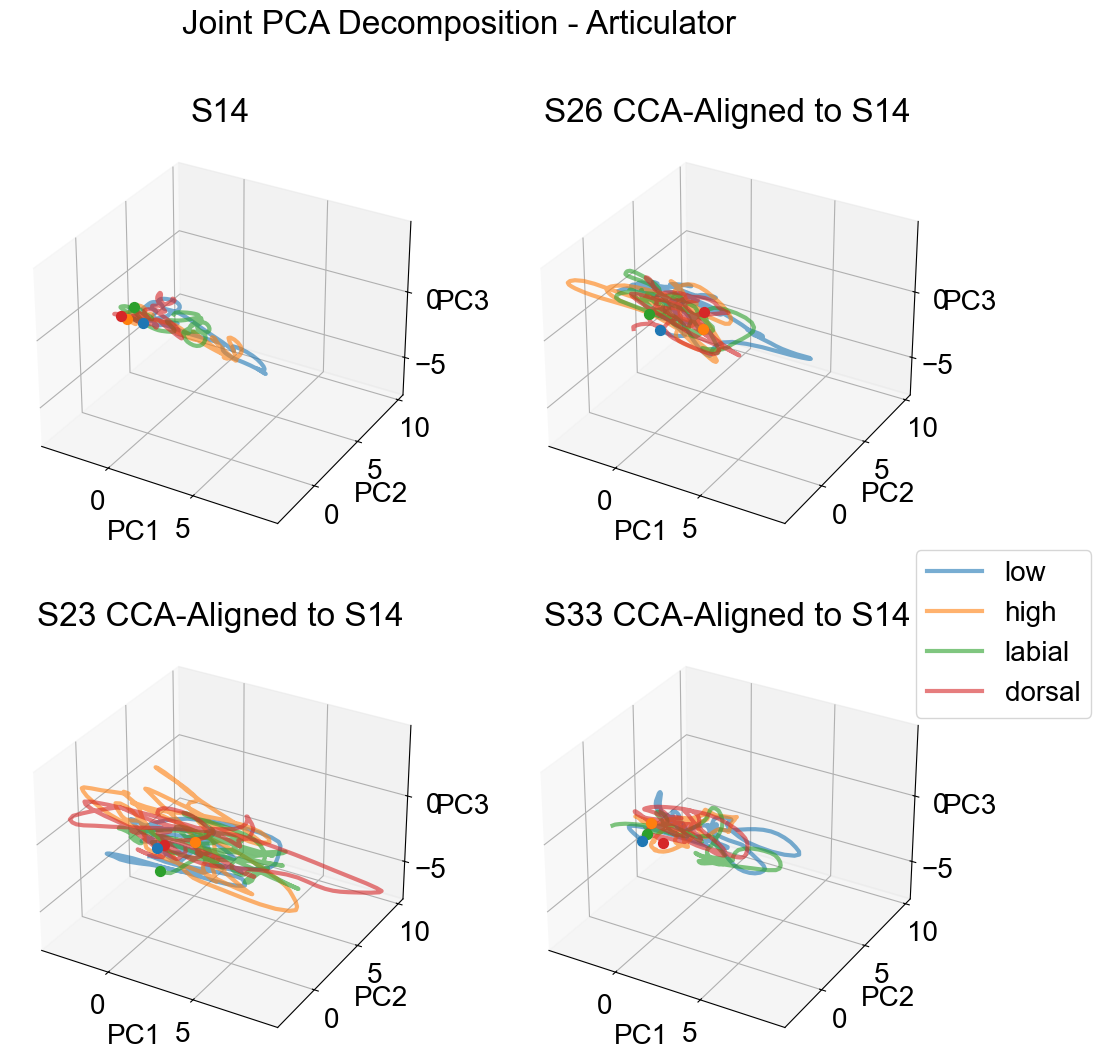

In [46]:
_ = plot_3D_lat_dyn([S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                # [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                artic_labels,
                # phon_labels,
                ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'],
                title='Joint PCA Decomposition - Articulator',
                # title='Joint PCA Decomposition - Phoneme',
                same_axes=True)

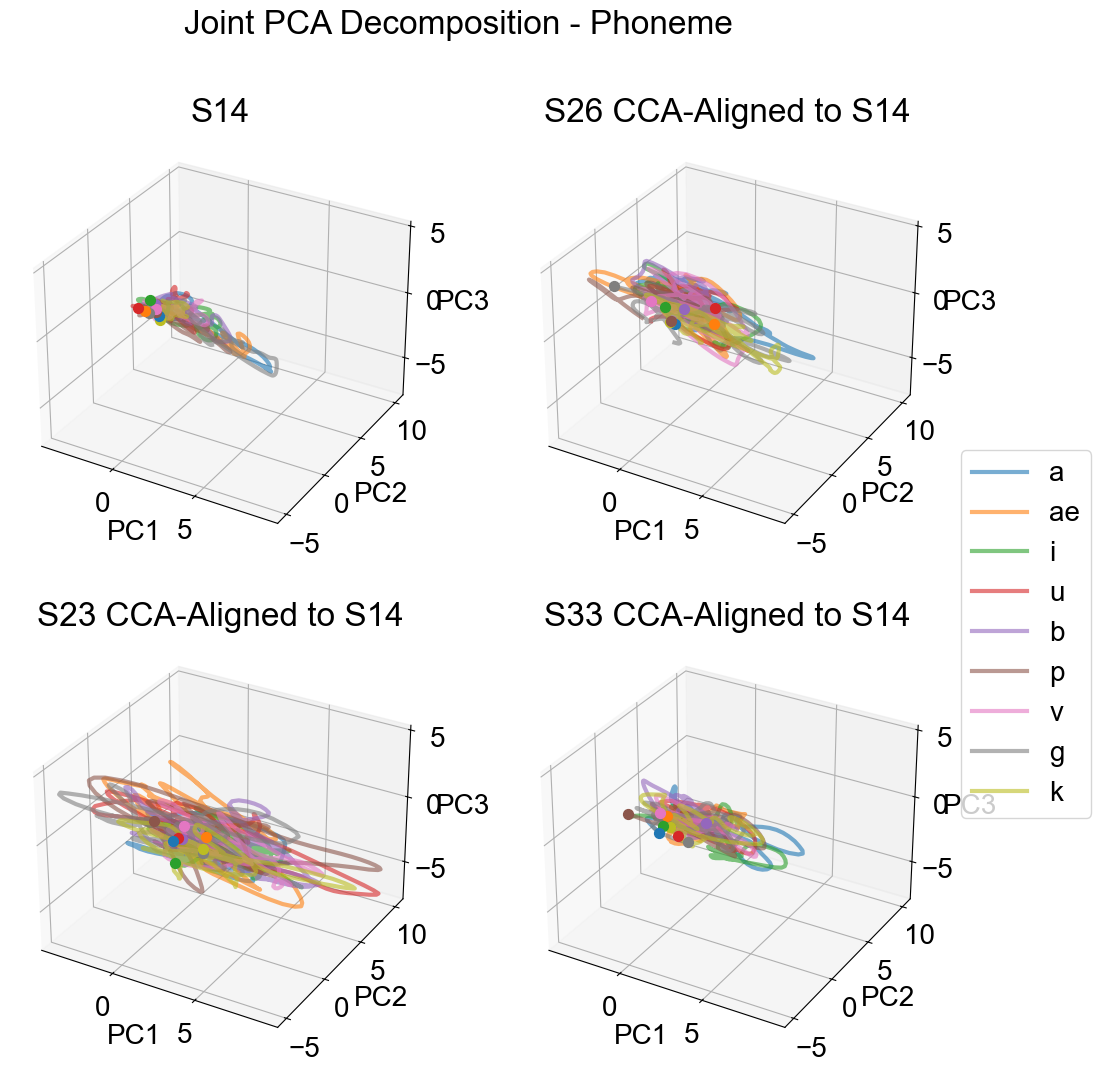

In [47]:
_ = plot_3D_lat_dyn([S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                # [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                # artic_labels,
                phon_labels,
                ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'],
                # title='Joint PCA Decomposition - Articulator',
                title='Joint PCA Decomposition - Phoneme',
                same_axes=True)

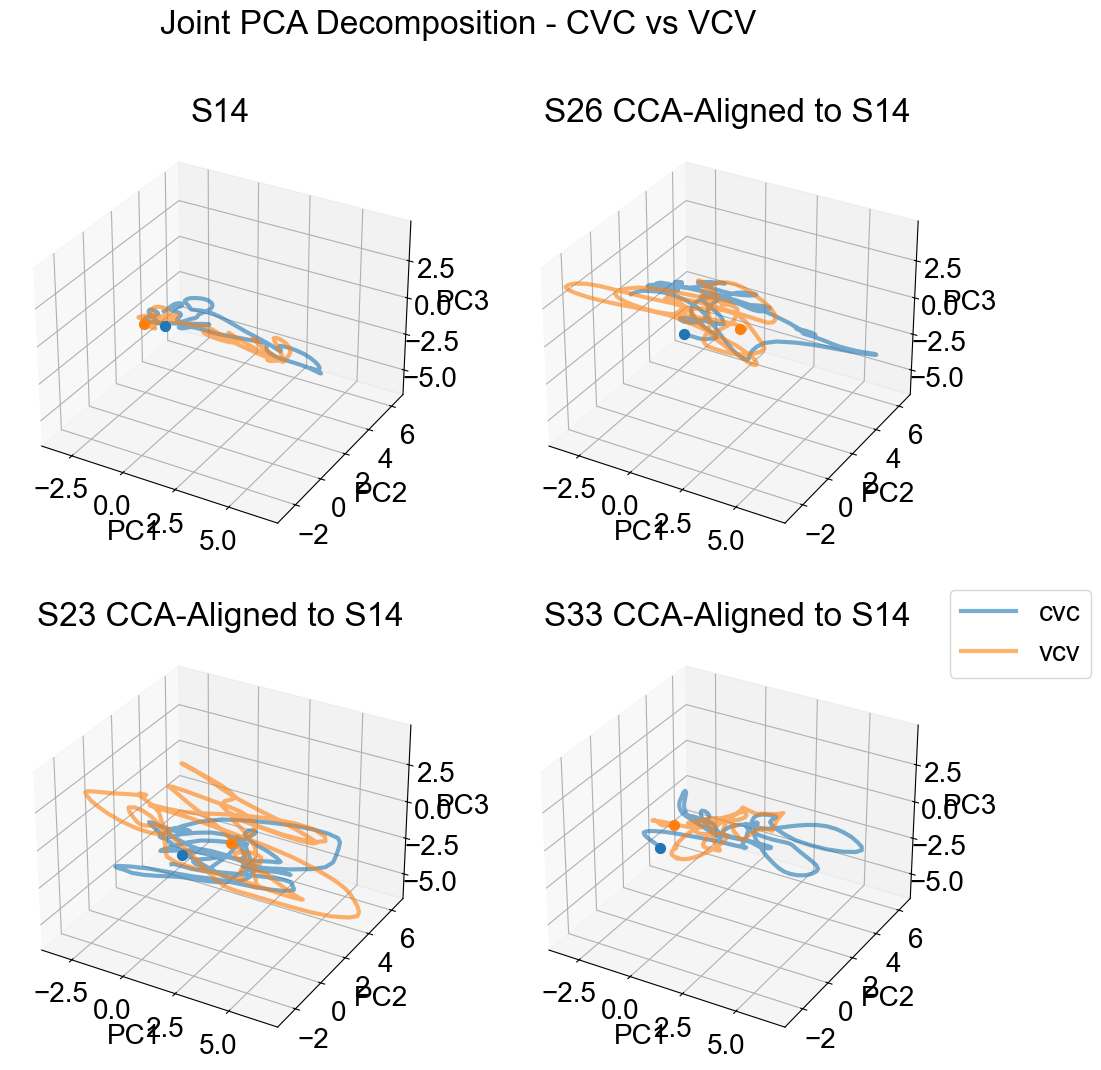

In [48]:
_ = plot_3D_lat_dyn([S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['cvc', 'vcv'],
                   ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'],
                   title='Joint PCA Decomposition - CVC vs VCV',
                   same_axes=True)

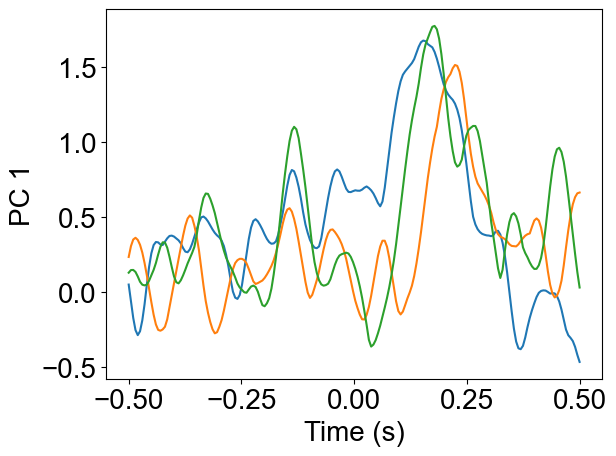

In [49]:
tr_ind = 0

plt.figure()
plt.plot(t, S14_joint_decomp[np.where(S14_phon_seqs == np.unique(S14_phon_seqs)[tr_ind])[0],:,0].T)
plt.ylabel('PC 1')
plt.xlabel('Time (s)')
plt.show()

## Pandas + Plotly Visualization

In [79]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl

In [80]:
S14_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S14_phon_labels])
S26_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S26_phon_labels])
S23_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S23_phon_labels])
S33_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S33_phon_labels])

### Dataframe Creation

In [81]:
t = np.linspace(-0.5, 0.5 - 1/S14_hg_trace.shape[1], S14_hg_trace.shape[1])
pt_names = ['S1', 'S2', 'S3', 'S4']
# pt_labels = [S14_full_labels, S26_full_labels, S23_full_labels, S33_full_labels]
pt_seqs = [S14_phon_seqs, S26_phon_seqs, S23_phon_seqs, S33_phon_seqs]

#### No CCA Alignment

In [82]:
data_unalgn = [S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp]

wide_dfs = []
long_dfs = []
for i, pt in enumerate(pt_names):
    d = data_unalgn[i]
    n_tr = d.shape[0]
    d = d.reshape(-1, d.shape[-1])
    df = pd.DataFrame(d, columns=[f'PC {i+1}' for i in range(d.shape[-1])])
    df['Time'] = np.tile(t, n_tr)
    df['Patient'] = [pt] * d.shape[0]
    df['Phoneme IDs'] = np.repeat(pt_seqs[i], t.shape[0])
    df['Vowel Sequence'] = df['Phoneme IDs'].apply(labels2cv)
    df['Phoneme Sequence'] = df['Phoneme IDs'].apply(lambda x: ''.join([phon_labels[int(i)-1] for i in x]))
    df['Articulator Sequence'] = df['Phoneme IDs'].apply(phon2artic_seq)
    # cols = df.columns.tolist()
    # cols = cols[-3:] + cols[:-3]
    # df = df[cols]
    wide_dfs.append(df)
    df = df.melt(id_vars=['Time', 'Patient', 'Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence'], var_name='PC', value_name='Value')
    df['PC'] = df['PC'].apply(lambda x: int(x.split(' ')[-1]))
    # df['PC'] = df['PC'] + 1
    # df = df[['Patient', 'Phoneme IDs', 'Time', 'PC', 'Value']]
    long_dfs.append(df)
unalgn_wide_df = pd.concat(wide_dfs)
unalgn_long_df = pd.concat(long_dfs)


In [83]:
unalgn_wide_df


PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0    -0.201943  0.095188  0.290830  0.270290  0.126030  0.387399  0.096517   
1    -0.277996  0.026179  0.407236  0.293979  0.201331  0.379472  0.109571   
2    -0.362174 -0.038427  0.540649  0.326893  0.285935  0.385795  0.137967   
3    -0.443162 -0.092415  0.680143  0.366375  0.365249  0.406794  0.178005   
4    -0.508486 -0.133597  0.809548  0.405561  0.428030  0.432595  0.229829   
...        ...       ...       ...       ...       ...       ...       ...   
9195  1.594263  0.522673  1.308137 -0.576098  0.665762 -0.724318  0.958845   
9196  1.598601  0.543807  1.308401 -0.582223  0.670841 -0.704603  0.954993   
9197  1.599663  0.562133  1.298993 -0.591396  0.670138 -0.695083  0.957679   
9198  1.594432  0.579710  1.282416 -0.596918  0.668889 -0.685584  0.958829   
9199  1.578827  0.592772  1.260808 -0.590201  0.662576 -0.660589  0.947093   

          PC 8      PC 9     PC 10  ...     PC 20     PC 21     PC 22  \
0    -0.131655 -0.028539  0.114406  ...  0.280338 -0.236403 -0.101297   
1    -0.146148  0.008023  0.081878  ...  0.309290 -0.191845 -0.147172   
2    -0.178641  0.053950  0.038403  ...  0.341646 -0.150106 -0.199464   
3    -0.223089  0.098675 -0.012622  ...  0.369563 -0.119577 -0.246919   
4    -0.266326  0.125042 -0.063126  ...  0.385073 -0.094821 -0.297145   
...        ...       ...       ...  ...       ...       ...       ...   
9195  0.676089  0.667340 -0.069303  ... -0.200724 -0.418913 -0.254216   
9196  0.736146  0.642066 -0.148282  ... -0.186251 -0.408142 -0.217379   
9197  0.784906  0.610988 -0.217707  ... -0.168811 -0.375612 -0.170654   
9198  0.812037  0.569456 -0.275964  ... -0.149613 -0.331403 -0.115715   
9199  0.824074  0.517162 -0.335513  ... -0.125289 -0.285753 -0.057206   

         PC 23   Time  Patient  Phoneme IDs  Vowel Sequence  Phoneme Sequence  \
0     0.620075 -0.500       S1          915             CVC               kab   
1     0.598738 -0.495       S1          915             CVC               kab   
2     0.568701 -0.490       S1          915             CVC               kab   
3     0.536252 -0.485       S1          915             CVC               kab   
4     0.499725 -0.480       S1          915             CVC               kab   
...        ...    ...      ...          ...             ...               ...   
9195  0.143862  0.475       S4          845             CVC               gub   
9196  0.130569  0.480       S4          845             CVC               gub   
9197  0.125630  0.485       S4          845             CVC               gub   
9198  0.124422  0.490       S4          845             CVC               gub   
9199  0.121463  0.495       S4          845             CVC               gub   

      Articulator Sequence  
0        dorsal_low_labial  
1        dorsal_low_labial  
2        dorsal_low_labial  
3        dorsal_low_labial  
4        dorsal_low_labial  
...                    ...  
9195    dorsal_high_labial  
9196    dorsal_high_labial  
9197    dorsal_high_labial  
9198    dorsal_high_labial  
9199    dorsal_high_labial  

[97800 rows x 29 columns]

In [84]:
unalgn_long_df

Time Patient Phoneme IDs Vowel Sequence Phoneme Sequence  \
0      -0.500      S1         915            CVC              kab   
1      -0.495      S1         915            CVC              kab   
2      -0.490      S1         915            CVC              kab   
3      -0.485      S1         915            CVC              kab   
4      -0.480      S1         915            CVC              kab   
...       ...     ...         ...            ...              ...   
211595  0.475      S4         845            CVC              gub   
211596  0.480      S4         845            CVC              gub   
211597  0.485      S4         845            CVC              gub   
211598  0.490      S4         845            CVC              gub   
211599  0.495      S4         845            CVC              gub   

       Articulator Sequence  PC     Value  
0         dorsal_low_labial   1 -0.201943  
1         dorsal_low_labial   1 -0.277996  
2         dorsal_low_labial   1 -0.362174  
3         dorsal_low_labial   1 -0.443162  
4         dorsal_low_labial   1 -0.508486  
...                     ...  ..       ...  
211595   dorsal_high_labial  23  0.143862  
211596   dorsal_high_labial  23  0.130569  
211597   dorsal_high_labial  23  0.125630  
211598   dorsal_high_labial  23  0.124422  
211599   dorsal_high_labial  23  0.121463  

[2249400 rows x 8 columns]

#### CCA Alignment

In [85]:
data_algn_S1 = [S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14]

wide_dfs = []
long_dfs = []
for i, pt in enumerate(pt_names):
    d = data_algn_S1[i]
    n_tr = d.shape[0]
    d = d.reshape(-1, d.shape[-1])
    df = pd.DataFrame(d, columns=[f'PC {i+1}' for i in range(d.shape[-1])])
    df['Time'] = np.tile(t, n_tr)
    df['Patient'] = [pt] * d.shape[0]
    df['Phoneme IDs'] = np.repeat(pt_seqs[i], t.shape[0])
    df['Vowel Sequence'] = df['Phoneme IDs'].apply(labels2cv)
    df['Phoneme Sequence'] = df['Phoneme IDs'].apply(lambda x: ''.join([phon_labels[int(i)-1] for i in x]))
    df['Articulator Sequence'] = df['Phoneme IDs'].apply(phon2artic_seq)
    # cols = df.columns.tolist()
    # cols = cols[-3:] + cols[:-3]
    # df = df[cols]
    wide_dfs.append(df)
    df = df.melt(id_vars=['Time', 'Patient', 'Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence'], var_name='PC', value_name='Value')
    df['PC'] = df['PC'].apply(lambda x: int(x.split(' ')[-1]))
    # df['PC'] = df['PC'] + 1
    # df = df[['Patient', 'Phoneme IDs', 'Time', 'PC', 'Value']]
    long_dfs.append(df)
algn_S1_wide_df = pd.concat(wide_dfs)
algn_S1_long_df = pd.concat(long_dfs)

In [86]:
algn_S1_wide_df

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0    -0.201943  0.095188  0.290830  0.270290  0.126030  0.387399  0.096517   
1    -0.277996  0.026179  0.407236  0.293979  0.201331  0.379472  0.109571   
2    -0.362174 -0.038427  0.540649  0.326893  0.285935  0.385795  0.137967   
3    -0.443162 -0.092415  0.680143  0.366375  0.365249  0.406794  0.178005   
4    -0.508486 -0.133597  0.809548  0.405561  0.428030  0.432595  0.229829   
...        ...       ...       ...       ...       ...       ...       ...   
9195 -0.311732 -0.063395  1.088700  0.435234  0.112974  0.444963  0.578781   
9196 -0.208589  0.055857  1.000201  0.452546  0.019963  0.494958  0.601261   
9197 -0.038058  0.222274  0.870407  0.475299 -0.139019  0.556106  0.617140   
9198  0.183322  0.437868  0.719921  0.515789 -0.353197  0.643784  0.631923   
9199  0.421070  0.672080  0.548464  0.557961 -0.584793  0.735937  0.638526   

          PC 8      PC 9     PC 10  ...     PC 20     PC 21     PC 22  \
0    -0.131655 -0.028539  0.114406  ...  0.280338 -0.236403 -0.101297   
1    -0.146148  0.008023  0.081878  ...  0.309290 -0.191845 -0.147172   
2    -0.178641  0.053950  0.038403  ...  0.341646 -0.150106 -0.199464   
3    -0.223089  0.098675 -0.012622  ...  0.369563 -0.119577 -0.246919   
4    -0.266326  0.125042 -0.063126  ...  0.385073 -0.094821 -0.297145   
...        ...       ...       ...  ...       ...       ...       ...   
9195 -0.630280  0.091152 -0.605381  ...  0.094821  0.051024 -0.327201   
9196 -0.634423  0.059026 -0.568487  ...  0.094999  0.050496 -0.349085   
9197 -0.643269  0.008804 -0.517124  ...  0.088387  0.049507 -0.370432   
9198 -0.676677 -0.033251 -0.468900  ...  0.083140  0.042823 -0.388850   
9199 -0.713452 -0.068038 -0.418381  ...  0.076178  0.030437 -0.401979   

         PC 23   Time  Patient  Phoneme IDs  Vowel Sequence  Phoneme Sequence  \
0     0.620075 -0.500       S1          915             CVC               kab   
1     0.598738 -0.495       S1          915             CVC               kab   
2     0.568701 -0.490       S1          915             CVC               kab   
3     0.536252 -0.485       S1          915             CVC               kab   
4     0.499725 -0.480       S1          915             CVC               kab   
...        ...    ...      ...          ...             ...               ...   
9195 -0.132091  0.475       S4          845             CVC               gub   
9196 -0.117791  0.480       S4          845             CVC               gub   
9197 -0.082741  0.485       S4          845             CVC               gub   
9198 -0.029917  0.490       S4          845             CVC               gub   
9199  0.029212  0.495       S4          845             CVC               gub   

      Articulator Sequence  
0        dorsal_low_labial  
1        dorsal_low_labial  
2        dorsal_low_labial  
3        dorsal_low_labial  
4        dorsal_low_labial  
...                    ...  
9195    dorsal_high_labial  
9196    dorsal_high_labial  
9197    dorsal_high_labial  
9198    dorsal_high_labial  
9199    dorsal_high_labial  

[97800 rows x 29 columns]

In [87]:
algn_S1_long_df

Time Patient Phoneme IDs Vowel Sequence Phoneme Sequence  \
0      -0.500      S1         915            CVC              kab   
1      -0.495      S1         915            CVC              kab   
2      -0.490      S1         915            CVC              kab   
3      -0.485      S1         915            CVC              kab   
4      -0.480      S1         915            CVC              kab   
...       ...     ...         ...            ...              ...   
211595  0.475      S4         845            CVC              gub   
211596  0.480      S4         845            CVC              gub   
211597  0.485      S4         845            CVC              gub   
211598  0.490      S4         845            CVC              gub   
211599  0.495      S4         845            CVC              gub   

       Articulator Sequence  PC     Value  
0         dorsal_low_labial   1 -0.201943  
1         dorsal_low_labial   1 -0.277996  
2         dorsal_low_labial   1 -0.362174  
3         dorsal_low_labial   1 -0.443162  
4         dorsal_low_labial   1 -0.508486  
...                     ...  ..       ...  
211595   dorsal_high_labial  23 -0.132091  
211596   dorsal_high_labial  23 -0.117791  
211597   dorsal_high_labial  23 -0.082741  
211598   dorsal_high_labial  23 -0.029917  
211599   dorsal_high_labial  23  0.029212  

[2249400 rows x 8 columns]

In [88]:
data_algn_S4 = [X_S14_S33, X_S26_S33, X_S23_S33, S33_joint_decomp]

wide_dfs = []
long_dfs = []
for i, pt in enumerate(pt_names):
    d = data_algn_S4[i]
    n_tr = d.shape[0]
    d = d.reshape(-1, d.shape[-1])
    df = pd.DataFrame(d, columns=[f'PC {i+1}' for i in range(d.shape[-1])])
    df['Time'] = np.tile(t, n_tr)
    df['Patient'] = [pt] * d.shape[0]
    df['Phoneme IDs'] = np.repeat(pt_seqs[i], t.shape[0])
    df['Vowel Sequence'] = df['Phoneme IDs'].apply(labels2cv)
    df['Phoneme Sequence'] = df['Phoneme IDs'].apply(lambda x: ''.join([phon_labels[int(i)-1] for i in x]))
    df['Articulator Sequence'] = df['Phoneme IDs'].apply(phon2artic_seq)
    # cols = df.columns.tolist()
    # cols = cols[-3:] + cols[:-3]
    # df = df[cols]
    wide_dfs.append(df)
    df = df.melt(id_vars=['Time', 'Patient', 'Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence'], var_name='PC', value_name='Value')
    df['PC'] = df['PC'].apply(lambda x: int(x.split(' ')[-1]))
    # df['PC'] = df['PC'] + 1
    # df = df[['Patient', 'Phoneme IDs', 'Time', 'PC', 'Value']]
    long_dfs.append(df)
algn_S4_wide_df = pd.concat(wide_dfs)
algn_S4_long_df = pd.concat(long_dfs)

In [89]:
algn_S4_wide_df

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0    -1.559563 -0.348850 -0.815531  0.544042 -0.826638  0.670492 -0.246743   
1    -1.363361 -0.274739 -0.660169  0.517808 -0.635699  0.704892 -0.267305   
2    -1.069226 -0.149445 -0.452689  0.451216 -0.341246  0.679631 -0.235948   
3    -0.754049  0.010867 -0.232953  0.360318 -0.009644  0.589104 -0.171410   
4    -0.434259  0.163618  0.000471  0.261462  0.286030  0.470576 -0.081338   
...        ...       ...       ...       ...       ...       ...       ...   
9195  1.594263  0.522673  1.308137 -0.576098  0.665762 -0.724318  0.958845   
9196  1.598601  0.543807  1.308401 -0.582223  0.670841 -0.704603  0.954993   
9197  1.599663  0.562133  1.298993 -0.591396  0.670138 -0.695083  0.957679   
9198  1.594432  0.579710  1.282416 -0.596918  0.668889 -0.685584  0.958829   
9199  1.578827  0.592772  1.260808 -0.590201  0.662576 -0.660589  0.947093   

          PC 8      PC 9     PC 10  ...     PC 20     PC 21     PC 22  \
0    -1.031775 -1.091646  1.797228  ... -0.085771 -0.070607  0.349930   
1    -0.841163 -0.977661  1.770827  ... -0.185291  0.085691  0.342302   
2    -0.715011 -0.880521  1.765038  ... -0.264823  0.233743  0.328640   
3    -0.643569 -0.783226  1.846468  ... -0.344704  0.319572  0.315509   
4    -0.554114 -0.646736  1.933200  ... -0.423900  0.353183  0.274804   
...        ...       ...       ...  ...       ...       ...       ...   
9195  0.676089  0.667340 -0.069303  ... -0.200724 -0.418913 -0.254216   
9196  0.736146  0.642066 -0.148282  ... -0.186251 -0.408142 -0.217379   
9197  0.784906  0.610988 -0.217707  ... -0.168811 -0.375612 -0.170654   
9198  0.812037  0.569456 -0.275964  ... -0.149613 -0.331403 -0.115715   
9199  0.824074  0.517162 -0.335513  ... -0.125289 -0.285753 -0.057206   

         PC 23   Time  Patient  Phoneme IDs  Vowel Sequence  Phoneme Sequence  \
0     0.051369 -0.500       S1          915             CVC               kab   
1     0.101868 -0.495       S1          915             CVC               kab   
2     0.145071 -0.490       S1          915             CVC               kab   
3     0.160642 -0.485       S1          915             CVC               kab   
4     0.162397 -0.480       S1          915             CVC               kab   
...        ...    ...      ...          ...             ...               ...   
9195  0.143862  0.475       S4          845             CVC               gub   
9196  0.130569  0.480       S4          845             CVC               gub   
9197  0.125630  0.485       S4          845             CVC               gub   
9198  0.124422  0.490       S4          845             CVC               gub   
9199  0.121463  0.495       S4          845             CVC               gub   

      Articulator Sequence  
0        dorsal_low_labial  
1        dorsal_low_labial  
2        dorsal_low_labial  
3        dorsal_low_labial  
4        dorsal_low_labial  
...                    ...  
9195    dorsal_high_labial  
9196    dorsal_high_labial  
9197    dorsal_high_labial  
9198    dorsal_high_labial  
9199    dorsal_high_labial  

[97800 rows x 29 columns]

In [90]:
algn_S4_long_df

Time Patient Phoneme IDs Vowel Sequence Phoneme Sequence  \
0      -0.500      S1         915            CVC              kab   
1      -0.495      S1         915            CVC              kab   
2      -0.490      S1         915            CVC              kab   
3      -0.485      S1         915            CVC              kab   
4      -0.480      S1         915            CVC              kab   
...       ...     ...         ...            ...              ...   
211595  0.475      S4         845            CVC              gub   
211596  0.480      S4         845            CVC              gub   
211597  0.485      S4         845            CVC              gub   
211598  0.490      S4         845            CVC              gub   
211599  0.495      S4         845            CVC              gub   

       Articulator Sequence  PC     Value  
0         dorsal_low_labial   1 -1.559563  
1         dorsal_low_labial   1 -1.363361  
2         dorsal_low_labial   1 -1.069226  
3         dorsal_low_labial   1 -0.754049  
4         dorsal_low_labial   1 -0.434259  
...                     ...  ..       ...  
211595   dorsal_high_labial  23  0.143862  
211596   dorsal_high_labial  23  0.130569  
211597   dorsal_high_labial  23  0.125630  
211598   dorsal_high_labial  23  0.124422  
211599   dorsal_high_labial  23  0.121463  

[2249400 rows x 8 columns]

### Plotting Functions

In [38]:
def line(error_y_mode=None, **kwargs):
    """Extension of `plotly.express.line` to use error bands.
    
    From https://stackoverflow.com/questions/69587547/continuous-error-band-with-plotly-express-in-python, user171780"""
    ERROR_MODES = {'bar','band','bars','bands',None}
    if error_y_mode not in ERROR_MODES:
        raise ValueError(f"'error_y_mode' must be one of {ERROR_MODES}, received {repr(error_y_mode)}.")
    if error_y_mode in {'bar','bars',None}:
        fig = px.line(**kwargs)
    elif error_y_mode in {'band','bands'}:
        if 'error_y' not in kwargs:
            raise ValueError(f"If you provide argument 'error_y_mode' you must also provide 'error_y'.")
        figure_with_error_bars = px.line(**kwargs)
        fig = px.line(**{arg: val for arg,val in kwargs.items() if arg != 'error_y'})
        for data in figure_with_error_bars.data:
            x = list(data['x'])
            y_upper = list(data['y'] + data['error_y']['array'])
            y_lower = list(data['y'] - data['error_y']['array'] if data['error_y']['arrayminus'] is None else data['y'] - data['error_y']['arrayminus'])
            color = f"rgba({tuple(int(data['line']['color'].lstrip('#')[i:i+2], 16) for i in (0, 2, 4))},.3)".replace('((','(').replace('),',',').replace(' ','')
            fig.add_trace(
                go.Scatter(
                    x = x+x[::-1],
                    y = y_upper+y_lower[::-1],
                    fill = 'toself',
                    fillcolor = color,
                    line = dict(
                        color = 'rgba(255,255,255,0)'
                    ),
                    hoverinfo = "skip",
                    showlegend = False,
                    legendgroup = data['legendgroup'],
                    xaxis = data['xaxis'],
                    yaxis = data['yaxis'],
                )
            )
        # Reorder data as said here: https://stackoverflow.com/a/66854398/8849755
        reordered_data = []
        for i in range(int(len(fig.data)/2)):
            reordered_data.append(fig.data[i+int(len(fig.data)/2)])
            reordered_data.append(fig.data[i])
        fig.data = tuple(reordered_data)
    return fig

In [39]:
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

### Unaligned PC1 Traces

In [193]:
fig_df = unalgn_long_df[(unalgn_long_df['PC'] == 1)].drop(columns=['PC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time', 'Vowel Sequence']).mean().reset_index()
fig_df['std'] = unalgn_long_df[(unalgn_long_df['PC'] == 1)].drop(columns=['PC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time', 'Vowel Sequence']).std().reset_index()['Value']
fig_df['count'] = unalgn_long_df[(unalgn_long_df['PC'] == 1)].drop(columns=['PC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time', 'Vowel Sequence']).count().reset_index()['Value']
fig_df['CI'] = 1.96 * (fig_df['std'] / np.sqrt(fig_df['count']))
fig_df['Vowel Sequence'] = fig_df['Vowel Sequence'].apply(lambda x: x.replace('CVC', 'Consonant-Vowel-Consonant').replace('VCV', 'Vowel-Consonant-Vowel'))

cm = [rgb2hex(int(255*a),int(255*b),int(255*c)) for a,b,c in px.colors.validate_colors(px.colors.qualitative.Dark2)]

# fig = px.line(fig_df, x='Time', y='Value', color='Vowel Sequence', title='Joint PCA Decomposition - Phoneme (Unaligned)', width=1000, height=600, facet_col='Patient', facet_col_wrap=2)
fig = line(data_frame=fig_df, x='Time', y='Value', error_y='CI',
           error_y_mode='band', color='Vowel Sequence', width=1200, height=900,
           facet_col='Patient', facet_col_wrap=2, facet_row_spacing=0.18,
           facet_col_spacing=0.08, color_discrete_sequence=cm)
fig.update_traces(line=dict(width=4))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# for i, pt in enumerate(['S1', 'S2', 'S3', 'S4']):
#     err_data = err_df[err_df['Patient'] == pt]
#     fig.add_trace(go.Line(x=err_data))
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        title='Phoneme Sequence',
        orientation='h',
        yanchor='bottom',
        y=1.05,
        # xanchor='right',
        # x=1.05,
        xanchor='left',
        x=0.00,
        # bgcolor='White',
        # bordercolor='Black',
        # borderwidth=2,
        font=dict(size=22, family='Arial'),
    ),
    margin=dict(l=35, r=25, t=125, b=0),
    # showlegend=False,
    # title_text='Latent Dynamics by Patient',
    title_text='Joint Latent Dynamics',
    title_x= 0.05,
    title_y = 0.99,
    font=dict(size=24, family='Arial'),
)
fig.update_xaxes(
    title='Time Relative to Response Onset (s)',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # matches=None,
    showticklabels=True,
)
fig.update_yaxes(
    title='PC 1',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    matches=None,
    showticklabels=True,
    title_standoff=0,
)

fig.show()

### Aligned PC1 Traces

In [179]:
fig_df = algn_S1_long_df[(algn_S1_long_df['PC'] == 1)].drop(columns=['PC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time', 'Vowel Sequence']).mean().reset_index()
fig_df['std'] = algn_S1_long_df[(algn_S1_long_df['PC'] == 1)].drop(columns=['PC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time', 'Vowel Sequence']).std().reset_index()['Value']
fig_df['count'] = algn_S1_long_df[(algn_S1_long_df['PC'] == 1)].drop(columns=['PC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time', 'Vowel Sequence']).count().reset_index()['Value']
fig_df['CI'] = 1.96 * (fig_df['std'] / np.sqrt(fig_df['count']))
fig_df['Vowel Sequence'] = fig_df['Vowel Sequence'].apply(lambda x: x.replace('CVC', 'Consonant-Vowel-Consonant').replace('VCV', 'Vowel-Consonant-Vowel'))

cm = [rgb2hex(int(255*a),int(255*b),int(255*c)) for a,b,c in px.colors.validate_colors(px.colors.qualitative.Dark2)]

# fig = px.line(fig_df, x='Time', y='Value', color='Vowel Sequence', title='Joint PCA Decomposition - Phoneme (Unaligned)', width=1000, height=600, facet_col='Patient', facet_col_wrap=2)
fig = line(data_frame=fig_df, x='Time', y='Value', error_y='CI',
           error_y_mode='band', color='Vowel Sequence', width=1200, height=900,
           facet_col='Patient', facet_col_wrap=2, facet_row_spacing=0.18,
           facet_col_spacing=0.10, color_discrete_sequence=cm)
fig.update_traces(line=dict(width=4))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.for_each_annotation(lambda a: a.update(text=((a.text + ' - Aligned to S1') if a.text != 'S1' else a.text)))
# for i, pt in enumerate(['S1', 'S2', 'S3', 'S4']):
#     err_data = err_df[err_df['Patient'] == pt]
#     fig.add_trace(go.Line(x=err_data))
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        title='Phoneme Sequence',
        orientation='h',
        yanchor='bottom',
        y=1.05,
        # xanchor='right',
        # x=1.05,
        xanchor='left',
        x=0.00,
        # bgcolor='White',
        # bordercolor='Black',
        # borderwidth=2,
        font=dict(size=22, family='Arial'),
    ),
    margin=dict(l=35, r=25, t=125, b=0),
    # showlegend=False,
    # title_text='Decoder Only Trained on Non-Target Patients',
    title_text='CCA-Aligned Latent Dynamics',
    title_x=0.065,
    title_y=0.99,
    font=dict(size=24, family='Arial'),
)
fig.update_xaxes(
    title='Time Relative to Response Onset (s)',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # matches=None,
    showticklabels=True,
)
fig.update_yaxes(
    title='PC 1',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # matches=None,
    showticklabels=True,
    title_standoff=0,
)

fig.show()

### Single Trial Diff Plot

In [101]:
# colors = ['darksalmon', 'slateblue']
colors = ['maroon', 'goldenrod']
colors_alpha = [mpl.colors.to_rgba(c, alpha=0.45) for c in colors]
colors_alpha = [f'rgba({int(255*c1)}, {int(255*c2)}, {int(255*c3)}, {a})' for c1, c2, c3, a in colors_alpha]

fig_df = unalgn_long_df[(unalgn_long_df['PC'] == 1) & ((unalgn_long_df['Phoneme Sequence'] == 'abae') | (unalgn_long_df['Phoneme Sequence'] == 'abi')) & (unalgn_long_df['Patient'] == 'S1')].drop(columns=['PC', 'Patient', 'Phoneme IDs', 'Vowel Sequence', 'Articulator Sequence'])
fig_df['Repeat'] = np.repeat(np.repeat(np.arange(1, 4), 200), 2)
fig_mean_df = unalgn_long_df[(unalgn_long_df['PC'] == 1) & ((unalgn_long_df['Phoneme Sequence'] == 'abae') | (unalgn_long_df['Phoneme Sequence'] == 'abi')) & (unalgn_long_df['Patient'] == 'S1')].drop(columns=['Patient', 'PC', 'Phoneme IDs', 'Vowel Sequence', 'Articulator Sequence']).groupby(['Time', 'Phoneme Sequence']).mean().reset_index()


fig = px.line(fig_mean_df, x='Time', y='Value', color='Phoneme Sequence', color_discrete_sequence=colors)
fig.update_traces(line=dict(width=6))
for val in np.unique(fig_df['Repeat']):
    for i, seq in enumerate(np.unique(fig_df['Phoneme Sequence'])):
        df = fig_df[(fig_df['Repeat'] == val) & (fig_df['Phoneme Sequence'] == seq)]
        fig.add_trace(go.Scatter(x=df['Time'], y=df['Value'], mode='lines', name=seq, fillcolor=colors_alpha[i], line=dict(color=colors_alpha[i], width=2.5), showlegend=False))

fig.update_layout(
    plot_bgcolor='white',
    width=1000,
    height=800,
    legend=dict(
        title='Phoneme Sequence',
        orientation='h',
        yanchor='bottom',
        y=0.95,
        # xanchor='right',
        # x=1.07,
        xanchor='left',
        x=0.05,
        # bgcolor='White',
        # bordercolor='Black',
        # borderwidth=2,
        font=dict(size=22, family='Arial'),
    ),
    # showlegend=False,
    # title_text='Decoder Only Trained on Non-Target Patients',
    title_text='S1 Latent Dynamics by Phoneme Sequence',
    # title_x=0.5,
    font=dict(size=24, family='Arial'),
)
fig.update_xaxes(
    title='Time Relative to Response Onset (s)',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # matches=None,
    showticklabels=True,
)
fig.update_yaxes(
    title='Principal Componenent (PC) 1',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    matches=None,
    showticklabels=True,
    title_standoff=0,
)

fig.show()

### 2D PCA Plot

C:\Users\zms14\AppData\Local\Temp\ipykernel_26288\2023671235.py:42: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g = sns.lineplot(data=fig_df[fig_df['Patient']=='S4'], x='PC 1', y='PC 2', hue='Patient', sort=False, linewidth=4.5, palette=colors)


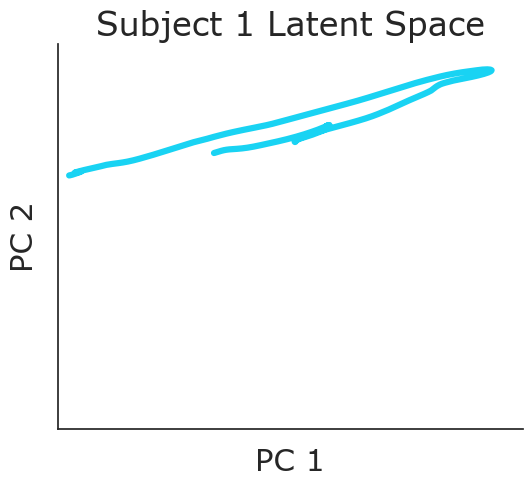

In [94]:
import plotly.express as px
import seaborn as sns
import matplotlib as mpl

colors = ['#19D3F3', '#FF6692']

fig_df = unalgn_wide_df[unalgn_wide_df['Patient'].isin(['S4', 'S2'])].drop(columns=['Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time']).mean().reset_index()
# fig = px.line(fig_df, x='PC 1', y='PC 2')
# fig.update_layout(
#     plot_bgcolor='white',
#     font=dict(size=18, family='Arial'),
#     width=500,
#     height=500,
#     title='asdf'
# )
# fig.update_xaxes(
#     title='Principal Component (PC) 1',
#     mirror=False,
#     ticks='outside',
#     tickvals=[],
#     showline=True,
#     linecolor='black',
#     showgrid=False,
#     side='bottom',
#     range=[-0.1, 3],
# )
# fig.update_yaxes(
#     title='PC 2',
#     mirror=False,
#     showticklabels=False,
#     showline=True,
#     linecolor='black',
#     showgrid=False,
#     range=[-2.9, 1.5],
# )
# fig.update_traces(line=dict(width=4))
# fig.show()

sns.set(font='Verdana', font_scale=1.5, style='white')

plt.figure(figsize=(6, 5))
g = sns.lineplot(data=fig_df[fig_df['Patient']=='S4'], x='PC 1', y='PC 2', hue='Patient', sort=False, linewidth=4.5, palette=colors)
# g = sns.lineplot(data=fig_df[fig_df['Patient']=='S2'], x='PC 1', y='PC 2', hue='Patient', sort=False, linewidth=4.5, palette=colors[1:])
sns.despine()
g.set_xticklabels([])
g.set_yticklabels([])
g.set_xlim([-0.1, 3])
g.set_ylim([-2.9, 1.5])
g.set_xlabel('PC 1', fontsize=22)
g.set_ylabel('PC 2', fontsize=22)
g.tick_params(left=False, bottom=False)
g.set_title('Subject 1 Latent Space', fontsize=24)
# g.set_title('Subject 2 Latent Space', fontsize=24)
plt.legend([],[], frameon=False)
plt.show()


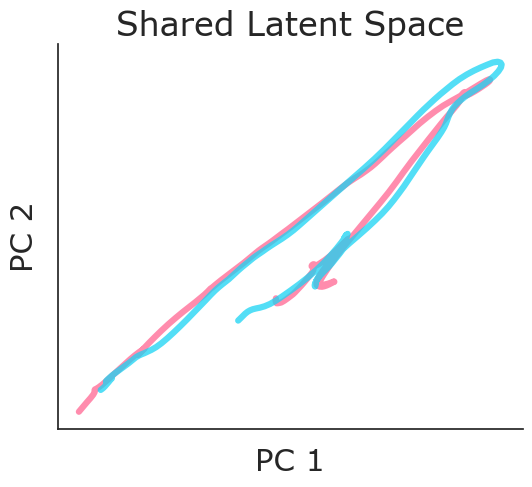

In [95]:
fig_df = algn_S4_wide_df[algn_S4_wide_df['Patient'].isin(['S4', 'S2'])].drop(columns=['Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time']).mean().reset_index()

plt.figure(figsize=(6, 5))
g = sns.lineplot(data=fig_df, x='PC 1', y='PC 2', hue='Patient', sort=False, linewidth=4.5, palette=colors[::-1], alpha=0.75)
sns.despine()
g.set_xticklabels([])
g.set_yticklabels([])
# g.set_xlim([-0.1, 3])
# g.set_ylim([-2.9, 1.5])
g.set_xlabel('PC 1', fontsize=22)
g.set_ylabel('PC 2', fontsize=22)
g.tick_params(left=False, bottom=False)
g.set_title('Shared Latent Space', fontsize=24)
# g.set_title('Subject 2 Latent Space', fontsize=20)
plt.legend([],[], frameon=False)
plt.show()

C:\Users\zms14\AppData\Local\Temp\ipykernel_12468\1253457156.py:5: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.

C:\Users\zms14\AppData\Local\Temp\ipykernel_12468\1253457156.py:6: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



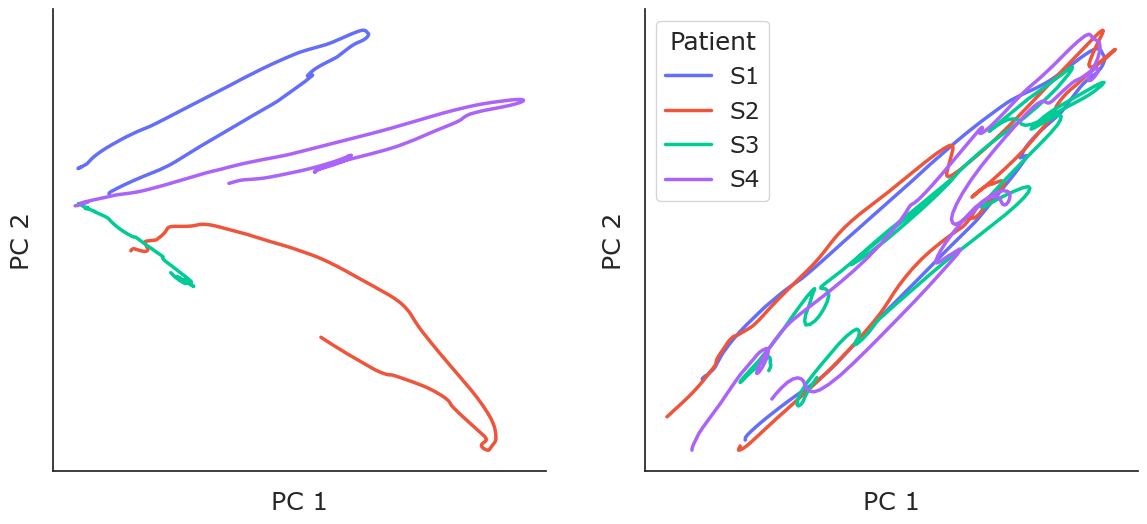

In [234]:
fig_unalgn_df = unalgn_wide_df.drop(columns=['Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time']).mean().reset_index()
fig_algn_df = algn_S1_wide_df.drop(columns=['Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence']).groupby(['Patient', 'Time']).mean().reset_index()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
g1 = sns.lineplot(data=fig_unalgn_df, x='PC 1', y='PC 2', hue='Patient', sort=False, linewidth=2.5, palette=px.colors.qualitative.Plotly, ax=ax1)
g2 = sns.lineplot(data=fig_algn_df, x='PC 1', y='PC 2', hue='Patient', sort=False, linewidth=2.5, palette=px.colors.qualitative.Plotly, ax=ax2)
sns.despine()
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xlabel('PC 1', fontsize=18)
ax1.set_ylabel('PC 2', fontsize=18)
ax1.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xlabel('PC 1', fontsize=18)
ax2.set_ylabel('PC 2', fontsize=18)
ax2.tick_params(left=False, bottom=False)

# g.set_title('Subject 2 Latent Space', fontsize=20)
ax1.legend([],[], frameon=False)
plt.show()

## Joint & Regular TSNE

In [ ]:
from sklearn.manifold import TSNE

t = np.linspace(-0.5, 0.5 - 1/S14_hg_trace.shape[1], S14_hg_trace.shape[1])
zero_ind = np.where(t == 0)[0][0]

perp = 30
tsne_comp = 2

S14_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S14_joint_decomp[:,zero_ind,:])
S26_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S26_joint_decomp[:,zero_ind,:])
S23_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S23_joint_decomp[:,zero_ind,:])
S33_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S33_joint_decomp[:,zero_ind,:])


t_pca_comp = 0.8
S14_time_pca = PCA(n_components=t_pca_comp).fit_transform(S14_joint_decomp.reshape(S14_joint_decomp.shape[0], -1))
S14_embed_time = TSNE(n_components=tsne_comp, perplexity=perp, early_exaggeration=4).fit_transform(S14_time_pca)
S26_time_pca = PCA(n_components=t_pca_comp).fit_transform(S26_joint_decomp.reshape(S26_joint_decomp.shape[0], -1))
S26_embed_time = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S26_time_pca)
S23_time_pca = PCA(n_components=t_pca_comp).fit_transform(S23_joint_decomp.reshape(S23_joint_decomp.shape[0], -1))
S23_embed_time = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S23_time_pca)
S33_time_pca = PCA(n_components=t_pca_comp).fit_transform(S33_joint_decomp.reshape(S33_joint_decomp.shape[0], -1))
S33_embed_time = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S33_time_pca)

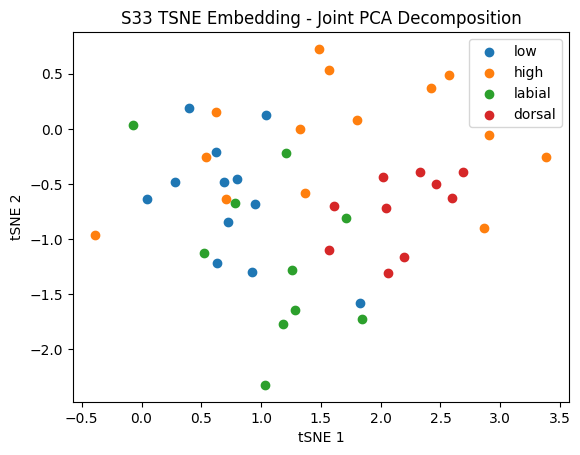

In [ ]:
data = S33_embed_time
labels = S33_artic_labels[:,0]
label_names = artic_labels

plt.figure()
for lab in np.unique(labels):
    plt.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], label=label_names[lab-1])
# plt.scatter(S14_embed_t0[:,0], S14_embed_t0[:,1], c=S14_artic_labels[:,0])
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('S33 TSNE Embedding - Joint PCA Decomposition')
plt.legend()
plt.show()

# f = plt.figure()
# ax = f.add_subplot(projection='3d')
# for lab in np.unique(labels):
#     ax.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], data[np.where(labels == lab)[0],2], label=label_names[lab-1])
# # plt.scatter(S14_embed_t0[:,0], S14_embed_t0[:,1], c=S14_artic_labels[:,0])
# plt.xlabel('tSNE 1')
# plt.ylabel('tSNE 2')
# ax.set_zlabel('tSNE 3')
# plt.title('S14 TSNE Embedding - Joint PCA Decomposition')
# plt.legend()
# plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

S14_joint_sil_scores = silhouette_samples(S14_embed_time, S14_artic_labels[:,0])
# S14_joint_sil = silhouette_score(S14_embed_time, S14_artic_labels[:,0])
print(f'S14 Joint-PCA Silhouette Score: {np.mean(S14_joint_sil_scores[np.where(S14_joint_sil_scores > 0)[0]])}')

S26_joint_sil_scores = silhouette_samples(S26_embed_time, S26_artic_labels[:,0])
# S26_joint_sil = silhouette_score(S26_embed_time, S26_artic_labels[:,0])
print(f'S26 Joint-PCA Silhouette Score: {np.mean(S26_joint_sil_scores[np.where(S26_joint_sil_scores > 0)[0]])}')

S23_joint_sil_scores = silhouette_samples(S23_embed_time, S23_artic_labels[:,0])
# S23_joint_sil = silhouette_score(S23_embed_time, S23_artic_labels[:,0])
print(f'S23 Joint-PCA Silhouette Score: {np.mean(S23_joint_sil_scores[np.where(S23_joint_sil_scores > 0)[0]])}')

S33_joint_sil_scores = silhouette_samples(S33_embed_time, S33_artic_labels[:,0])
# S33_joint_sil = silhouette_score(S33_embed_time, S33_artic_labels[:,0])
print(f'S33 Joint-PCA Silhouette Score: {np.mean(S33_joint_sil_scores[np.where(S33_joint_sil_scores > 0)[0]])}')

S14 Joint-PCA Silhouette Score: 0.18488289415836334
S26 Joint-PCA Silhouette Score: 0.22684462368488312
S23 Joint-PCA Silhouette Score: 0.06652616709470749
S33 Joint-PCA Silhouette Score: 0.33366310596466064


In [ ]:
pca_var = 0.8

##### P1 Data #####
S14_sep_pca_X = S14_hg_trace.reshape(S14_hg_trace.shape[0], -1)
S14_sep_pca = PCA(n_components=pca_var).fit_transform(S14_sep_pca_X)
S14_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S14_sep_pca)

S26_sep_pca_X = S26_hg_trace.reshape(S26_hg_trace.shape[0], -1)
S26_sep_pca = PCA(n_components=pca_var).fit_transform(S26_sep_pca_X)
S26_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S26_sep_pca)

S23_sep_pca_X = S23_hg_trace.reshape(S23_hg_trace.shape[0], -1)
S23_sep_pca = PCA(n_components=pca_var).fit_transform(S23_sep_pca_X)
S23_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S23_sep_pca)

S33_sep_pca_X = S33_hg_trace.reshape(S33_hg_trace.shape[0], -1)
S33_sep_pca = PCA(n_components=pca_var).fit_transform(S33_sep_pca_X)
S33_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S33_sep_pca)


##### Collapsed Across Positions #####
S14_coll_pca_X = S14_hg_collapsed.reshape(S14_hg_collapsed.shape[0], -1)
S14_coll_pca = PCA(n_components=pca_var).fit_transform(S14_coll_pca_X)
S14_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S14_coll_pca)

S26_coll_pca_X = S26_hg_collapsed.reshape(S26_hg_collapsed.shape[0], -1)
S26_coll_pca = PCA(n_components=pca_var).fit_transform(S26_coll_pca_X)
S26_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S26_coll_pca)

S23_coll_pca_X = S23_hg_collapsed.reshape(S23_hg_collapsed.shape[0], -1)
S23_coll_pca = PCA(n_components=pca_var).fit_transform(S23_coll_pca_X)
S23_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S23_coll_pca)

S33_coll_pca_X = S33_hg_collapsed.reshape(S33_hg_collapsed.shape[0], -1)
S33_coll_pca = PCA(n_components=pca_var).fit_transform(S33_coll_pca_X)
S33_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S33_coll_pca)

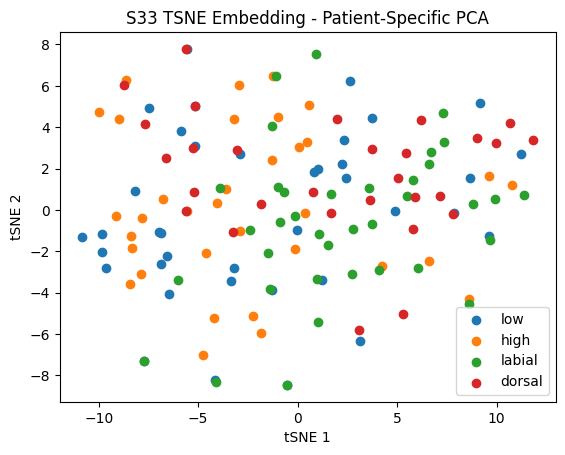

In [ ]:
data = S33_coll_embed
labels = S33_artic_labels_collapsed
# labels = S33_artic_labels[:,0]
label_names = artic_labels

plt.figure()
for lab in np.unique(labels):
    plt.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], label=label_names[lab-1])
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('S33 TSNE Embedding - Patient-Specific PCA')
plt.legend()
plt.show()

# f = plt.figure()
# ax = f.add_subplot(projection='3d')
# for lab in np.unique(labels):
#     ax.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], data[np.where(labels == lab)[0],2], label=label_names[lab-1])
# # plt.scatter(S14_embed_t0[:,0], S14_embed_t0[:,1], c=S14_artic_labels[:,0])
# plt.xlabel('tSNE 1')
# plt.ylabel('tSNE 2')
# ax.set_zlabel('tSNE 3')
# plt.title('S14 TSNE Embedding - Patient-Specific PCA')
# plt.legend()
# plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

S14_sep_sil_scores = silhouette_samples(S14_sep_embed, S14_artic_labels[:,0])
# S14_sep_sil = silhouette_score(S14_sep_embed, S14_artic_labels[:,0])
print(f'S14 PS-PCA Silhouette Score: {np.mean(S14_sep_sil_scores[np.where(S14_sep_sil_scores > 0)[0]])}')

S26_sep_sil_scores = silhouette_samples(S26_sep_embed, S26_artic_labels[:,0])
# S26_sep_sil = silhouette_score(S26_sep_embed, S26_artic_labels[:,0])
print(f'S26 PS-PCA Silhouette Score: {np.mean(S26_sep_sil_scores[np.where(S26_sep_sil_scores > 0)[0]])}')

S23_sep_sil_scores = silhouette_samples(S23_sep_embed, S23_artic_labels[:,0])
# S23_sep_sil = silhouette_score(S23_sep_embed, S23_artic_labels[:,0])
print(f'S23 PS-PCA Silhouette Score: {np.mean(S23_sep_sil_scores[np.where(S23_sep_sil_scores > 0)[0]])}')

S33_sep_sil_scores = silhouette_samples(S33_sep_embed, S33_artic_labels[:,0])
# S33_sep_sil = silhouette_score(S33_sep_embed, S33_artic_labels[:,0])
print(f'S33 PS-PCA Silhouette Score: {np.mean(S33_sep_sil_scores[np.where(S33_sep_sil_scores > 0)[0]])}')

S14 PS-PCA Silhouette Score: 0.3364023268222809
S26 PS-PCA Silhouette Score: 0.1526738405227661
S23 PS-PCA Silhouette Score: 0.16618718206882477
S33 PS-PCA Silhouette Score: 0.2860357463359833


# Multi-view CCA

In [25]:
from mvlearn.embed import GCCA, MCCA
from mvlearn.plotting import crossviews_plot

## Intial Testing (Getting same number of samples by taking first n trials/timepoints)

In [32]:
Xs = [S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1]), S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1]), S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1]), S33_hg_trace.reshape(-1, S33_hg_trace.shape[-1])]

In [33]:
[x.shape for x in Xs]

[(29800, 111), (30400, 111), (30600, 63), (10400, 149)]

In [34]:
min_dim = min([X.shape[0] for X in Xs])
Xs = [X[:min_dim,:] for X in Xs]

In [35]:
mcca = MCCA(n_components=10, regs=0.5)
gcca = GCCA(fraction_var=0.8)

In [36]:
mcca_scores = mcca.fit_transform(Xs)
gcca_scores = gcca.fit_transform(Xs)

In [37]:
print(mcca_scores.shape)
print(gcca_scores.shape)

(4, 10400, 10)
(4, 10400, 18)


In [38]:
print(mcca_corrs := mcca.canon_corrs(mcca_scores))

[[[1.         0.69036878 0.60910478 0.64750398]
  [0.69036878 1.         0.68932727 0.69762671]
  [0.60910478 0.68932727 1.         0.65739845]
  [0.64750398 0.69762671 0.65739845 1.        ]]

 [[1.         0.53742975 0.40676685 0.54281948]
  [0.53742975 1.         0.43995344 0.5757207 ]
  [0.40676685 0.43995344 1.         0.45151243]
  [0.54281948 0.5757207  0.45151243 1.        ]]

 [[1.         0.49707769 0.43084899 0.53048568]
  [0.49707769 1.         0.43731796 0.52605259]
  [0.43084899 0.43731796 1.         0.41274158]
  [0.53048568 0.52605259 0.41274158 1.        ]]

 [[1.         0.37299142 0.37579439 0.47818669]
  [0.37299142 1.         0.40914549 0.49601373]
  [0.37579439 0.40914549 1.         0.46715386]
  [0.47818669 0.49601373 0.46715386 1.        ]]

 [[1.         0.43159671 0.38021397 0.47766755]
  [0.43159671 1.         0.38916638 0.46716891]
  [0.38021397 0.38916638 1.         0.3914855 ]
  [0.47766755 0.46716891 0.3914855  1.        ]]

 [[1.         0.44490917 0.329

In [43]:
mcca_corrs.shape

(10, 4, 4)

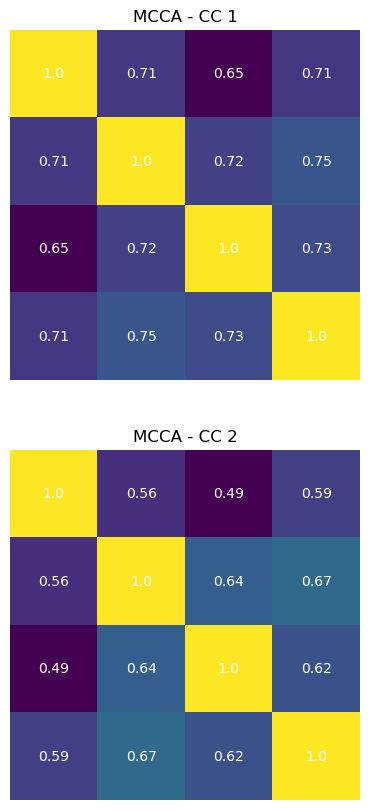

In [50]:
f, axs = plt.subplots(2, 1, figsize=(5, 10))
for k, ax in enumerate(axs):
    ax.imshow(mcca_corrs[k])
    ax.set_title(f'MCCA - CC {k+1}')
    for i in range(len(mcca_corrs[k])):
        for j in range(len(mcca_corrs[k])):
            text = ax.text(j, i, round(mcca_corrs[k, i, j], 2),
                        ha="center", va="center", color="w")
    ax.set_axis_off()
plt.show()

In [ ]:
print(mcca.canon_corrs(gcca_scores))

In [25]:
mcca.canon_corrs(mcca_scores).shape

(30, 4, 4)

## Fit model with condition averaged data, transform on single trial data

In [26]:
from functools import reduce

In [27]:
cnd_avg_data = [S14_phon_cnd_avg, S26_phon_cnd_avg, S23_phon_cnd_avg, S33_phon_cnd_avg]
# swap axes of all datasets in cnd_avg_data
cnd_avg_data = [np.swapaxes(data, 0, 2) for data in cnd_avg_data]

labels = [S14_phon_seqs, S26_phon_seqs, S23_phon_seqs, S33_phon_seqs]
shared_lab = reduce(np.intersect1d, labels)
cnd_avg_data = [cnd_avg_data[i][np.isin(np.unique(lab), shared_lab,
                                        assume_unique=True)] for i, lab
                in enumerate(labels)]

In [28]:
[x.shape for x in cnd_avg_data]

[(52, 200, 128), (52, 200, 128), (52, 200, 128), (52, 200, 256)]

In [29]:
cnd_avg_data = [data.reshape(-1, data.shape[-1]) for data in cnd_avg_data]
print([x.shape for x in cnd_avg_data])

[(10400, 128), (10400, 128), (10400, 128), (10400, 256)]


Calculate number of PCs explaining 80% of variance in patient-specific data for use in iMCCA

In [30]:
# calculate number of PCs explaining 80% of the variance in each patients' data
joint_rank = 10
hg_list = [S14_hg_trace, S26_hg_trace, S23_hg_trace, S33_hg_trace]
print([x.reshape(-1, x.shape[-1]).shape for x in hg_list])
ranks = [PCA(n_components=0.9).fit(data.reshape(-1, data.shape[-1])).n_components_ for data in hg_list]
ranks = list(np.maximum(ranks, joint_rank))
print(ranks)

[(29800, 128), (30400, 128), (30600, 128), (10400, 256)]
[31, 31, 10, 78]


In [31]:
mcca = MCCA(n_components=joint_rank, regs=0.5, signal_ranks=ranks)
mcca_scores = mcca.fit_transform(cnd_avg_data)

In [32]:
subject_trials = [data.shape[0] for data in hg_list]
hg_list = [data.reshape(-1, data.shape[-1]) for data in hg_list]
mcca_algned_data = [mcca.transform_view(data, i) for i, data in enumerate(hg_list)]
mcca_algned_data = [data.reshape(subject_trials[i], -1, data.shape[-1]) for i, data in enumerate(mcca_algned_data)]
print([data.shape for data in mcca_algned_data])

[(149, 200, 10), (152, 200, 10), (153, 200, 10), (52, 200, 10)]


### Plotting

In [33]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl

In [141]:
S14_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S14_phon_labels])
S26_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S26_phon_labels])
S23_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S23_phon_labels])
S33_full_labels = np.array([''.join([phon_labels[i-1] for i in seq]) for seq in S33_phon_labels])

In [142]:
t = np.linspace(-0.5, 0.5 - 1/S14_hg_trace.shape[1], S14_hg_trace.shape[1])
pt_names = ['S1', 'S2', 'S3', 'S4']
# pt_labels = [S14_full_labels, S26_full_labels, S23_full_labels, S33_full_labels]
pt_seqs = [S14_phon_seqs, S26_phon_seqs, S23_phon_seqs, S33_phon_seqs]

In [143]:
wide_dfs = []
long_dfs = []
for i, pt in enumerate(pt_names):
    d = mcca_algned_data[i]
    n_tr = d.shape[0]
    n_time = d.shape[1]
    d = d.reshape(-1, d.shape[-1])
    df = pd.DataFrame(d, columns=[f'CC {i+1}' for i in range(d.shape[-1])])
    df['Time'] = np.tile(t, n_tr)
    df['Patient'] = [pt] * d.shape[0]
    df['Trial'] = np.arange(1, n_tr+1).repeat(n_time)
    df['Phoneme IDs'] = np.repeat(pt_seqs[i], t.shape[0])
    df['Vowel Sequence'] = df['Phoneme IDs'].apply(labels2cv)
    df['Phoneme Sequence'] = df['Phoneme IDs'].apply(lambda x: ''.join([phon_labels[int(i)-1] for i in x]))
    df['Articulator Sequence'] = df['Phoneme IDs'].apply(phon2artic_seq)
    # cols = df.columns.tolist()
    # cols = cols[-3:] + cols[:-3]
    # df = df[cols]
    wide_dfs.append(df)
    df = df.melt(id_vars=['Time', 'Patient', 'Trial', 'Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence'], var_name='CC', value_name='Value')
    df['CC'] = df['CC'].apply(lambda x: int(x.split(' ')[-1]))
    # df['PC'] = df['PC'] + 1
    # df = df[['Patient', 'Phoneme IDs', 'Time', 'PC', 'Value']]
    long_dfs.append(df)
mcca_wide_df = pd.concat(wide_dfs)
mcca_long_df = pd.concat(long_dfs)

In [144]:
mcca_wide_df[mcca_wide_df['Patient'] == 'S2']

CC 1      CC 2      CC 3      CC 4      CC 5      CC 6      CC 7  \
0     -0.008318 -0.001251  0.005259 -0.001836 -0.005066 -0.002587  0.002583   
1     -0.006944  0.000222  0.005675 -0.002645 -0.005651 -0.003739  0.005775   
2     -0.005279  0.001213  0.005852 -0.002639 -0.006543 -0.004436  0.008591   
3     -0.003795  0.002354  0.005889 -0.001994 -0.007678 -0.004559  0.010975   
4     -0.002851  0.004028  0.005559 -0.001247 -0.007956 -0.004282  0.012674   
...         ...       ...       ...       ...       ...       ...       ...   
30395  0.006077 -0.013159 -0.007330  0.007889 -0.001307 -0.011755  0.015358   
30396  0.005049 -0.014150 -0.007832  0.004716 -0.003967 -0.012456  0.012557   
30397  0.004032 -0.014997 -0.008109  0.000643 -0.006400 -0.012259  0.009053   
30398  0.003270 -0.015897 -0.007417 -0.003961 -0.008357 -0.011712  0.005207   
30399  0.002784 -0.016624 -0.005770 -0.008135 -0.009626 -0.010921  0.001895   

           CC 8      CC 9     CC 10   Time Patient  Trial Phoneme IDs  \
0      0.001582  0.002807 -0.005459 -0.500      S2      1         153   
1      0.003413  0.003465 -0.006033 -0.495      S2      1         153   
2      0.004862  0.003680 -0.005363 -0.490      S2      1         153   
3      0.005754  0.004133 -0.004588 -0.485      S2      1         153   
4      0.006054  0.005273 -0.004424 -0.480      S2      1         153   
...         ...       ...       ...    ...     ...    ...         ...   
30395  0.007262 -0.001166 -0.002938  0.475      S2    152         152   
30396  0.007319 -0.002404 -0.002688  0.480      S2    152         152   
30397  0.006838 -0.002852 -0.002724  0.485      S2    152         152   
30398  0.006209 -0.003120 -0.002879  0.490      S2    152         152   
30399  0.005387 -0.003430 -0.003223  0.495      S2    152         152   

      Vowel Sequence Phoneme Sequence Articulator Sequence  
0                VCV              abi      low_labial_high  
1                VCV              abi      low_labial_high  
2                VCV              abi      low_labial_high  
3                VCV              abi      low_labial_high  
4                VCV              abi      low_labial_high  
...              ...              ...                  ...  
30395            VCV             abae       low_labial_low  
30396            VCV             abae       low_labial_low  
30397            VCV             abae       low_labial_low  
30398            VCV             abae       low_labial_low  
30399            VCV             abae       low_labial_low  

[30400 rows x 17 columns]

In [145]:
fig_df = mcca_long_df[(mcca_long_df['CC'] == 1)].drop(columns=['CC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence', 'Trial']).groupby(['Patient', 'Time', 'Vowel Sequence']).mean().reset_index()
fig_df['std'] = mcca_long_df[(mcca_long_df['CC'] == 1)].drop(columns=['CC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence', 'Trial']).groupby(['Patient', 'Time', 'Vowel Sequence']).std().reset_index()['Value']
fig_df['count'] = mcca_long_df[(mcca_long_df['CC'] == 1)].drop(columns=['CC', 'Phoneme IDs', 'Phoneme Sequence', 'Articulator Sequence', 'Trial']).groupby(['Patient', 'Time', 'Vowel Sequence']).count().reset_index()['Value']
fig_df['CI'] = 1.96 * (fig_df['std'] / np.sqrt(fig_df['count']))
fig_df['Vowel Sequence'] = fig_df['Vowel Sequence'].apply(lambda x: x.replace('CVC', 'Consonant-Vowel-Consonant').replace('VCV', 'Vowel-Consonant-Vowel'))

cm = [rgb2hex(int(255*a),int(255*b),int(255*c)) for a,b,c in px.colors.validate_colors(px.colors.qualitative.Dark2)]

# fig = px.line(fig_df, x='Time', y='Value', color='Vowel Sequence', title='Joint PCA Decomposition - Phoneme (Unaligned)', width=1000, height=600, facet_col='Patient', facet_col_wrap=2)
fig = line(data_frame=fig_df, x='Time', y='Value', error_y='CI',
           error_y_mode='band', color='Vowel Sequence', width=1500, height=900,
           facet_col='Patient', facet_col_wrap=2, facet_row_spacing=0.18,
           facet_col_spacing=0.1, color_discrete_sequence=cm)
fig.update_traces(line=dict(width=4))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# for i, pt in enumerate(['S1', 'S2', 'S3', 'S4']):
#     err_data = err_df[err_df['Patient'] == pt]
#     fig.add_trace(go.Line(x=err_data))
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        title='Phoneme Sequence',
        orientation='h',
        yanchor='bottom',
        y=1.05,
        # xanchor='right',
        # x=1.05,
        xanchor='left',
        x=0.00,
        # bgcolor='White',
        # bordercolor='Black',
        # borderwidth=2,
        font=dict(size=22, family='Arial'),
    ),
    margin=dict(l=25, r=25, t=125, b=0),
    # showlegend=False,
    # title_text='Latent Dynamics by Patient',
    title_text='MCCA Aligned Latent Dynamics',
    title_x= 0.05,
    title_y = 0.99,
    font=dict(size=24, family='Arial'),
)
fig.update_xaxes(
    title='Time Relative to Response Onset (s)',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # matches=None,
    showticklabels=True,
)
fig.update_yaxes(
    title='CC 1',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # matches=None,
    showticklabels=True,
    title_standoff=0,
)

fig.show()

In [149]:
fig_df = mcca_wide_df[(mcca_wide_df['Time'] >= 0) & (mcca_wide_df['Time'] <= 0.25)]
fig_df = fig_df.drop(columns=['Phoneme Sequence', 'Time']).groupby(['Patient', 'Articulator Sequence', 'Phoneme IDs', 'Trial', 'Vowel Sequence']).mean().reset_index()
fig_df['First Articulator'] = fig_df['Articulator Sequence'].apply(lambda x: x.split('_')[0])
fig_df['First Phoneme'] = fig_df['Phoneme IDs'].apply(lambda x: phon_labels[int(x[0])-1])
fig_df['Vowel Sequence'] = fig_df['Vowel Sequence'].apply(lambda x: x.replace('CVC', 'Consonant-Vowel-Consonant').replace('VCV', 'Vowel-Consonant-Vowel'))
fig_df = fig_df.drop(columns=['Phoneme IDs'])
cols = fig_df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
fig_df = fig_df[cols]


color_col = 'First Articulator'
fig = px.scatter(fig_df, x='CC 1', y='CC 2', color=color_col,
                 facet_col='Patient', facet_col_wrap=2, facet_row_spacing=0.2,
                 facet_col_spacing=0.1, width=1300, height=800)

fig.update_traces(marker=dict(size=10))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        title=color_col,
        orientation='h',
        yanchor='bottom',
        y=1.05,
        # xanchor='right',
        # x=1.05,
        xanchor='left',
        x=0.00,
        # bgcolor='White',
        # bordercolor='Black',
        # borderwidth=2,
        font=dict(size=22, family='Arial'),
    ),
    margin=dict(l=25, r=25, t=125, b=0),
    # showlegend=False,
    # title_text='Latent Dynamics by Patient',
    title_text='MCCA Aligned CCs',
    title_x= 0.05,
    title_y = 0.99,
    font=dict(size=24, family='Arial'),
)
fig.update_xaxes(
    title='CC 1',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    matches=None,
    showticklabels=True,
)
fig.update_yaxes(
    title='CC 2',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    matches=None,
    showticklabels=True,
    title_standoff=0,
)

fig.show()

In [134]:
fig_df = mcca_wide_df[(mcca_wide_df['Time'] >= 0) & (mcca_wide_df['Time'] <= 0.25)]
fig_df = fig_df[fig_df['Patient'] == 'S3']
fig_df = fig_df.drop(columns=['Phoneme Sequence', 'Time', 'Patient']).groupby(['Articulator Sequence', 'Phoneme IDs', 'Trial', 'Vowel Sequence']).mean().reset_index()
fig_df['First Articulator'] = fig_df['Articulator Sequence'].apply(lambda x: x.split('_')[0])
fig_df['First Phoneme'] = fig_df['Phoneme IDs'].apply(lambda x: phon_labels[int(x[0])-1])
fig_df['Vowel Sequence'] = fig_df['Vowel Sequence'].apply(lambda x: x.replace('CVC', 'Consonant-Vowel-Consonant').replace('VCV', 'Vowel-Consonant-Vowel'))
fig_df = fig_df.drop(columns=['Phoneme IDs'])
cols = fig_df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
fig_df = fig_df[cols]

color_col = 'First Articulator'
fig = px.scatter_3d(fig_df, x='CC 1', y='CC 2', z='CC 3', color=color_col, width=1200, height=600)

fig.update_traces(marker=dict(size=10))

## MCCA TSNE Scatters

In [57]:
from sklearn.manifold import TSNE

t = np.linspace(-0.5, 0.5 - 1/S14_hg_trace.shape[1], S14_hg_trace.shape[1])
tsne_win = [-0.25, 0.25]
t_inds = np.where((t >= tsne_win[0]) & (t <= tsne_win[1]))[0]

perp = 30
tsne_comp = 2

# S14_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S14_joint_decomp[:,zero_ind,:])
mcca_tsnes = [TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(np.mean(data[:,t_inds,:], 1)) for data in mcca_algned_data]


In [58]:
[x.shape for x in mcca_tsnes]

[(149, 2), (152, 2), (153, 2), (52, 2)]

In [59]:
# convert tsne arrays to wide pandas df
tsne_wide_dfs = []
tsne_long_dfs = []
for i, pt in enumerate(pt_names):
    d = mcca_tsnes[i]
    n_tr = d.shape[0]
    df = pd.DataFrame(d, columns=[f'tSNE {i+1}' for i in range(d.shape[-1])])
    df['Patient'] = [pt] * d.shape[0]
    df['Trial'] = np.arange(1, n_tr+1)
    df['Phoneme IDs'] = pt_seqs[i]
    df['Vowel Sequence'] = df['Phoneme IDs'].apply(labels2cv)
    df['Phoneme Sequence'] = df['Phoneme IDs'].apply(lambda x: ''.join([phon_labels[int(i)-1] for i in x]))
    df['Articulator Sequence'] = df['Phoneme IDs'].apply(phon2artic_seq)
    tsne_wide_dfs.append(df)
    df = df.melt(id_vars=['Patient', 'Trial', 'Phoneme IDs', 'Vowel Sequence', 'Phoneme Sequence', 'Articulator Sequence'], var_name='tSNE', value_name='Value')
    df['tSNE'] = df['tSNE'].apply(lambda x: int(x.split(' ')[-1]))
    tsne_long_dfs.append(df)
mcca_tsne_wide_df = pd.concat(tsne_wide_dfs)
mcca_tsne_long_df = pd.concat(tsne_long_dfs)

In [60]:
mcca_tsne_wide_df

tSNE 1     tSNE 2 Patient  Trial Phoneme IDs Vowel Sequence  \
0  -2.585775   8.194219      S1      1         519            CVC   
1   6.400236  12.007407      S1      2         915            CVC   
2   3.732289   3.104095      S1      3         825            CVC   
3  -0.082459  11.905207      S1      4         364            VCV   
4   0.793219   7.007123      S1      5         281            VCV   
..       ...        ...     ...    ...         ...            ...   
47  1.615973  -1.947095      S4     48         364            VCV   
48  3.022124  -3.555747      S4     49         251            VCV   
49  4.713023  -3.182158      S4     50         845            CVC   
50  4.791527  -1.497923      S4     51         515            CVC   
51  5.969287  -3.480607      S4     52         827            CVC   

   Phoneme Sequence Articulator Sequence  
0               bak    labial_low_dorsal  
1               kab    dorsal_low_labial  
2              gaeb    dorsal_low_labial  
3               ipu     high_labial_high  
4              aega       low_dorsal_low  
..              ...                  ...  
47              ipu     high_labial_high  
48             aeba       low_labial_low  
49              gub   dorsal_high_labial  
50              bab    labial_low_labial  
51             gaev    dorsal_low_labial  

[506 rows x 8 columns]

In [63]:
fig_df = mcca_tsne_wide_df.drop(columns=['Phoneme Sequence']).groupby(['Patient', 'Articulator Sequence', 'Phoneme IDs', 'Trial', 'Vowel Sequence']).mean().reset_index()
fig_df['First Articulator'] = fig_df['Articulator Sequence'].apply(lambda x: x.split('_')[0])
fig_df['First Phoneme'] = fig_df['Phoneme IDs'].apply(lambda x: phon_labels[int(x[0])-1])
fig_df['Vowel Sequence'] = fig_df['Vowel Sequence'].apply(lambda x: x.replace('CVC', 'Consonant-Vowel-Consonant').replace('VCV', 'Vowel-Consonant-Vowel'))
fig_df = fig_df.drop(columns=['Phoneme IDs'])
cols = fig_df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
fig_df = fig_df[cols]


color_col = 'First Articulator'
fig = px.scatter(fig_df, x='tSNE 1', y='tSNE 2', color=color_col,
                 facet_col='Patient', facet_col_wrap=2, facet_row_spacing=0.2,
                 facet_col_spacing=0.1, width=1300, height=800)

fig.update_traces(marker=dict(size=10))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        title=color_col,
        orientation='h',
        yanchor='bottom',
        y=1.05,
        # xanchor='right',
        # x=1.05,
        xanchor='left',
        x=0.00,
        # bgcolor='White',
        # bordercolor='Black',
        # borderwidth=2,
        font=dict(size=22, family='Arial'),
    ),
    margin=dict(l=25, r=25, t=125, b=0),
    # showlegend=False,
    # title_text='Latent Dynamics by Patient',
    title_text='tSNE on MCCA Aligned CCs',
    title_x= 0.05,
    title_y = 0.99,
    font=dict(size=24, family='Arial'),
)
fig.update_xaxes(
    title='tSNE 1',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    matches=None,
    showticklabels=True,
)
fig.update_yaxes(
    title='tSNE 2',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    matches=None,
    showticklabels=True,
    title_standoff=0,
)

fig.show()

## Electrode Contribution

In [34]:
import scipy.io as sio
S14_chan_map = sio.loadmat('../data/S14/channelMap.mat')['chanMap']
S26_chan_map = sio.loadmat('../data/S26/channelMap.mat')['chanMap']
S23_chan_map = sio.loadmat('../data/S23/channelMap.mat')['chanMap']
S33_chan_map = sio.loadmat('../data/S33/channelMapAll.mat')['chanMapAll'][:12,:24]

In [36]:
mcca_corrs = mcca.canon_corrs(mcca_scores)
print(mcca_corrs.shape)
print(mcca_corrs)

(10, 4, 4)
[[[1.         0.76834149 0.62320891 0.68794396]
  [0.76834149 1.         0.7034093  0.74605224]
  [0.62320891 0.7034093  1.         0.62511425]
  [0.68794396 0.74605224 0.62511425 1.        ]]

 [[1.         0.63824317 0.30953964 0.59797758]
  [0.63824317 1.         0.30056542 0.60924077]
  [0.30953964 0.30056542 1.         0.33505377]
  [0.59797758 0.60924077 0.33505377 1.        ]]

 [[1.         0.57469714 0.30088767 0.60775049]
  [0.57469714 1.         0.32607207 0.55205283]
  [0.30088767 0.32607207 1.         0.32285629]
  [0.60775049 0.55205283 0.32285629 1.        ]]

 [[1.         0.39970577 0.16177763 0.34418079]
  [0.39970577 1.         0.20177439 0.45253948]
  [0.16177763 0.20177439 1.         0.1820589 ]
  [0.34418079 0.45253948 0.1820589  1.        ]]

 [[1.         0.2832963  0.19383676 0.28362195]
  [0.2832963  1.         0.21194325 0.36879845]
  [0.19383676 0.21194325 1.         0.2592635 ]
  [0.28362195 0.36879845 0.2592635  1.        ]]

 [[1.         0.208

In [37]:
# average across non diagonal elements in correlation matrices
weights = (mcca_corrs != 1).astype(int)
pt_corrs = np.average(mcca_corrs, weights=weights, axis=1)

In [38]:
S14_corrs = pt_corrs[:,0]
S14_loading = mcca.loadings_[0].T
S14_elec_mcca = np.dot(S14_corrs, S14_loading)
# S14_elec_mcca = S14_loading.T @ S14_corrs
print(S14_elec_mcca.shape)

S26_corrs = pt_corrs[:,1]
S26_loading = mcca.loadings_[1].T
S26_elec_mcca = np.dot(S26_corrs, S26_loading)
print(S26_elec_mcca.shape)

S23_corrs = pt_corrs[:,2]
S23_loading = mcca.loadings_[2].T
S23_elec_mcca = np.dot(S23_corrs, S23_loading)
print(S23_elec_mcca.shape)

S33_corrs = pt_corrs[:,3]
S33_loading = mcca.loadings_[3].T
S33_elec_mcca = np.dot(S33_corrs, S33_loading)
print(S33_elec_mcca.shape)

(128,)
(128,)
(128,)
(256,)


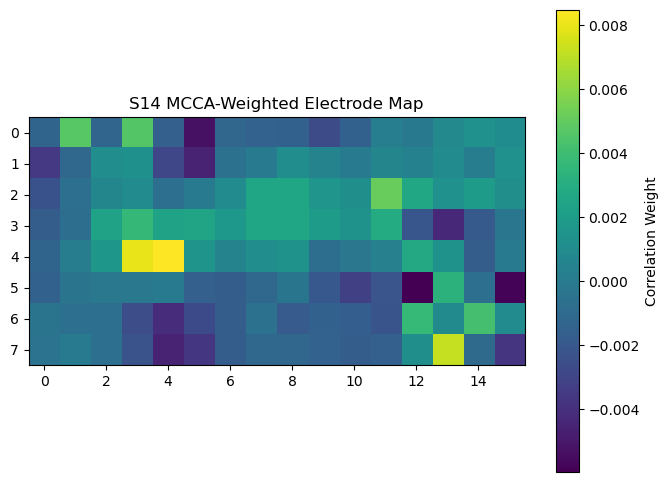

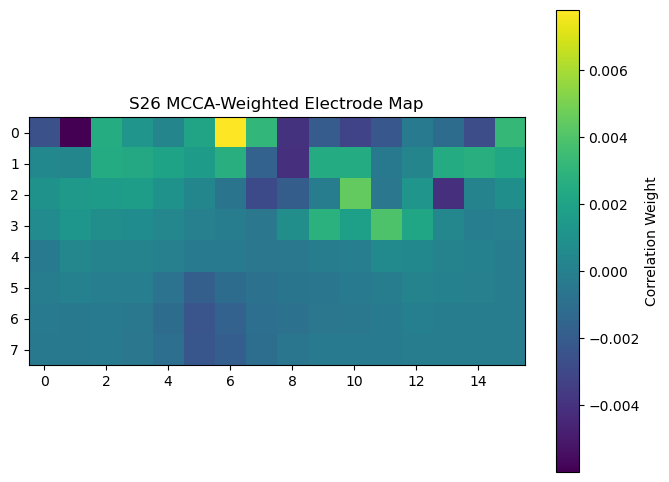

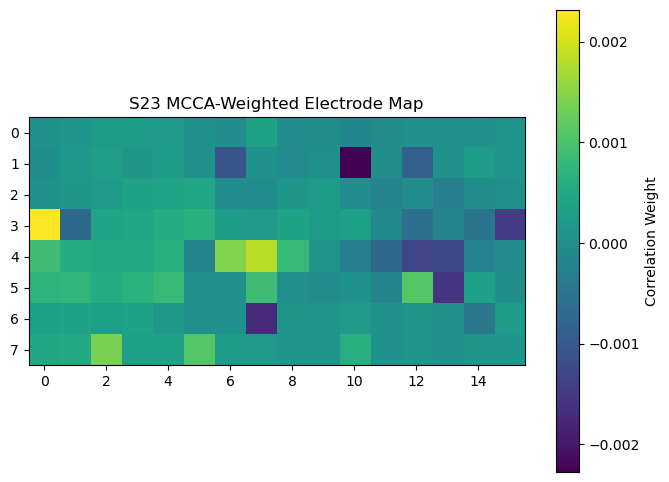

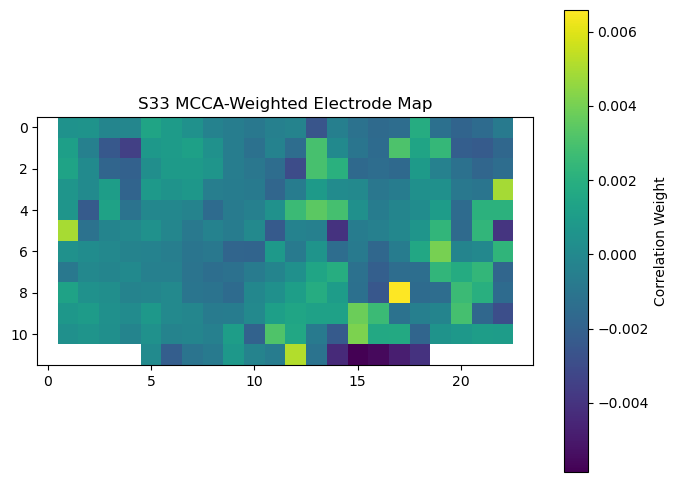

In [312]:
chan_disp(S14_elec_mcca, np.flipud(S14_chan_map), 'S14 MCCA-Weighted Electrode Map', 'Correlation Weight', figsize=(8,6))
chan_disp(S26_elec_mcca, np.flipud(S26_chan_map), 'S26 MCCA-Weighted Electrode Map', 'Correlation Weight', figsize=(8,6))
chan_disp(S23_elec_mcca, np.flipud(S23_chan_map), 'S23 MCCA-Weighted Electrode Map', 'Correlation Weight', figsize=(8,6))
chan_disp(S33_elec_mcca, np.flipud(S33_chan_map), 'S33 MCCA-Weighted Electrode Map', 'Correlation Weight', figsize=(8,6))

# Electrode Contribution (Decoding Weights)

In [285]:
pt_data = [S14_hg_trace, S26_hg_trace, S23_hg_trace, S33_hg_trace]
# pt_labels = [S14_phon_labels, S26_phon_labels, S23_phon_labels, S33_phon_labels]
pt_labels = [S14_artic_labels, S26_artic_labels, S23_artic_labels, S33_artic_labels]

In [287]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from alignment.alignment_methods import MCCAAlign
from alignment.cross_pt_decoders import crossPtDecoder_mcca

pt = 'S14'
pt_list = ['S14', 'S26', 'S23', 'S33']
pt_ind = pt_list.index(pt)

clf = LinearSVC()

X = pt_data[pt_ind]
y_full = pt_labels[pt_ind]
X_train, X_test, y_full_train, y_full_test = train_test_split(X, y_full, test_size=0.2, random_state=42)
y_train, y_test = y_full_train[:,0], y_full_test[:,0]

cross_pt_data = [(pt_data[i], pt_labels[i][:,0], pt_labels[i]) for i in range(len(pt_data)) if i != pt_ind]

model = crossPtDecoder_mcca(cross_pt_data, clf, MCCAAlign)
model.fit(X_train, y_train, y_align=y_full_train)
score = model.score(X_test, y_test)
print(score)


0.6333333333333333


In [288]:
model.decoder.coef_.shape

(4, 2000)

In [304]:
# get decoding coefficents for desired class
class_ind = 3
# class_label = phon_labels[class_ind]
class_label = artic_labels[class_ind]
coefs = model.decoder.coef_[class_ind]
coefs_by_time = coefs.reshape(X.shape[1], -1)
coefs_by_time.shape

(200, 10)

In [305]:
# extract transformation matrix from MCCA model for desired patient
mcca_loadings = model.aligner.mcca.loadings_
pt_feats_to_elec = mcca_loadings[0].T

pt_feats_to_elec.shape

(10, 128)

In [306]:
# project decoding coefficients onto electrode space via transformation matrix
elec_coefs_by_time = np.dot(coefs_by_time, pt_feats_to_elec)
elec_coefs_by_time.shape

(200, 128)

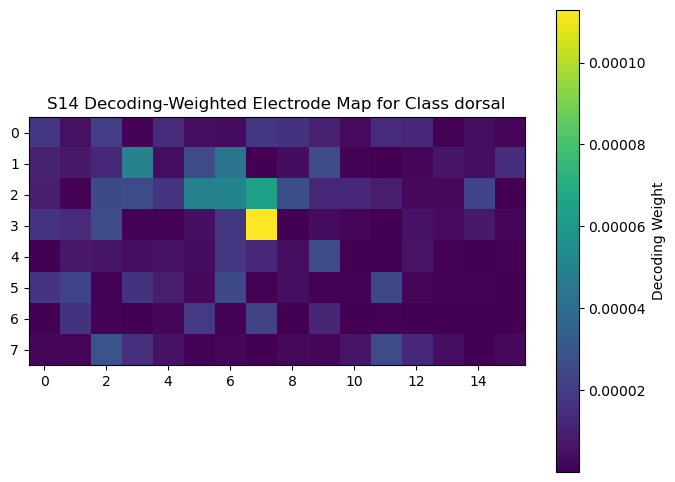

In [307]:
chan_maps = [S14_chan_map, S26_chan_map, S23_chan_map, S33_chan_map]
chan_map = chan_maps[pt_ind]

t_window = [-0.25, 0.25]
t = np.linspace(-0.5, 0.5 - 1/X.shape[1], X.shape[1])
t_inds = np.where((t >= t_window[0]) & (t <= t_window[1]))[0]
elec_coefs = np.mean(elec_coefs_by_time[t_inds], axis=0)
elec_coefs.shape
chan_disp(np.square(elec_coefs), np.flipud(chan_map), f'{pt} Decoding-Weighted Electrode Map for Class {class_label}', 'Decoding Weight', figsize=(8,6))

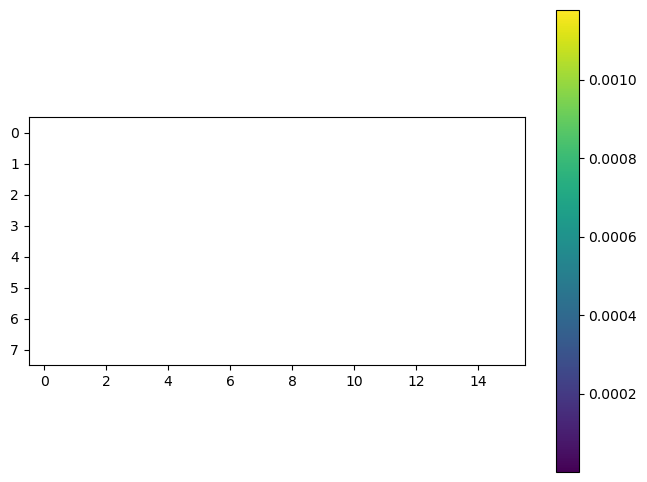

In [308]:
import matplotlib.animation as animation
from IPython.display import HTML

f, ax = plt.subplots(figsize=(8,6))

ims = []
for i in range(elec_coefs_by_time.shape[0]):
    data = elec_coefs_by_time[i]
    chan_data = np.flipud(np.array([data[int(i)] if not np.isnan(i) else np.nan for i in (chan_map.flatten()-1)]))
    im = ax.imshow(np.square(chan_data.reshape(chan_map.shape)), cmap='viridis', animated=True)
    # ax.set_title(f'S14 Decoding-Weighted Electrode Map for Class {class_label}\nTime {t[i]:.2f} s')
    ttl = plt.text(0.5, 1.01, f'{pt} Decoding-Weighted Electrode Map for Class {class_label}\nTime {t[i]:.2f} s', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    # plt.colorbar(im, ax=ax)
    if i == 0:
    #     ax.imshow(np.abs(elec_coefs_by_time[i].reshape(S14_chan_map.shape)), cmap='viridis')
        plt.colorbar(im, ax=ax)
    ims.append([im, ttl])

ani = animation.ArtistAnimation(f, ims, interval=100, repeat_delay=1000)
ani.save(filename=f'{pt}_decoding_elec_map_{class_label}.mp4')
# plt.show()
HTML(ani.to_html5_video())